<a href="https://colab.research.google.com/github/tapanjha/Data-Science/blob/main/Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Case Study-1: checking different patterns in Data***

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/milknew.csv")

In [ ]:
df

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.nunique() #Return the no of unique value in each column

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
for i in df.columns:
 print(i)
 print(df[i].unique())
 print('\n')

In [ ]:
for i in df.columns:
 print(i)
 print(df[i].value_counts())
 print('\n')

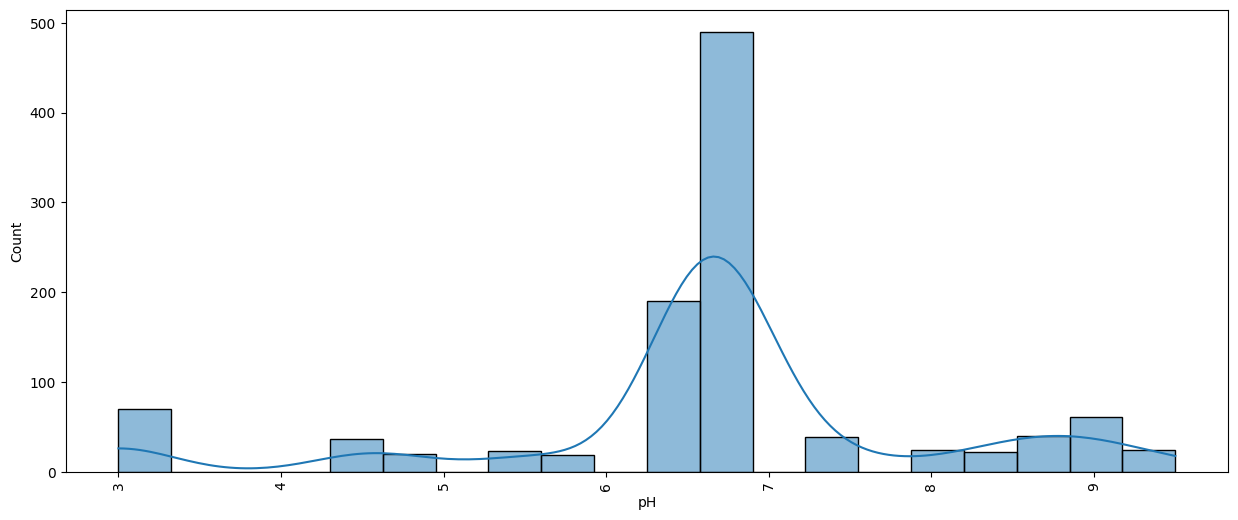

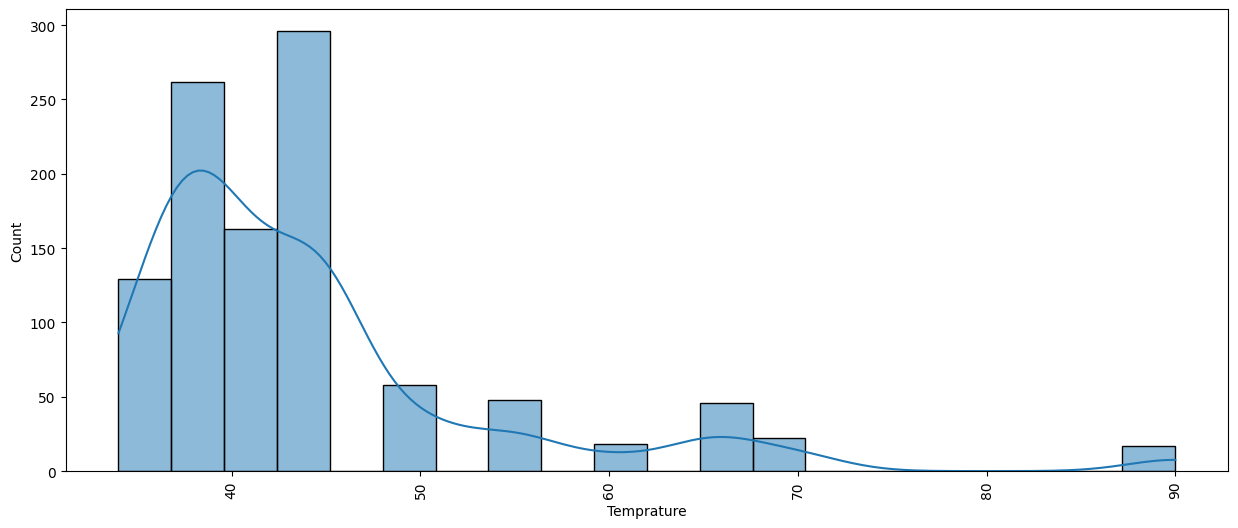

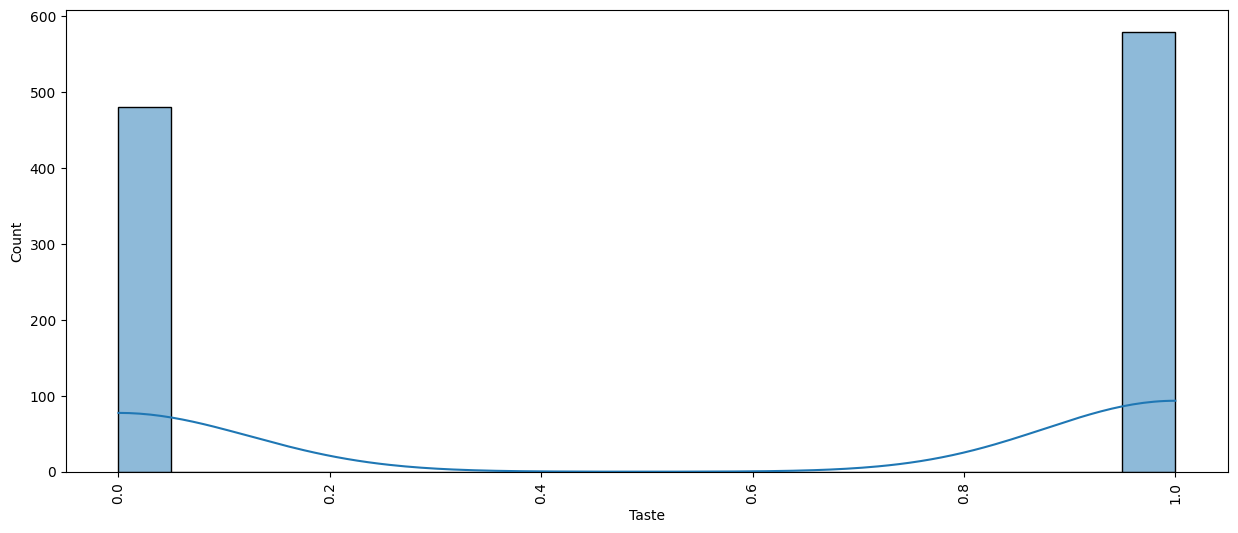

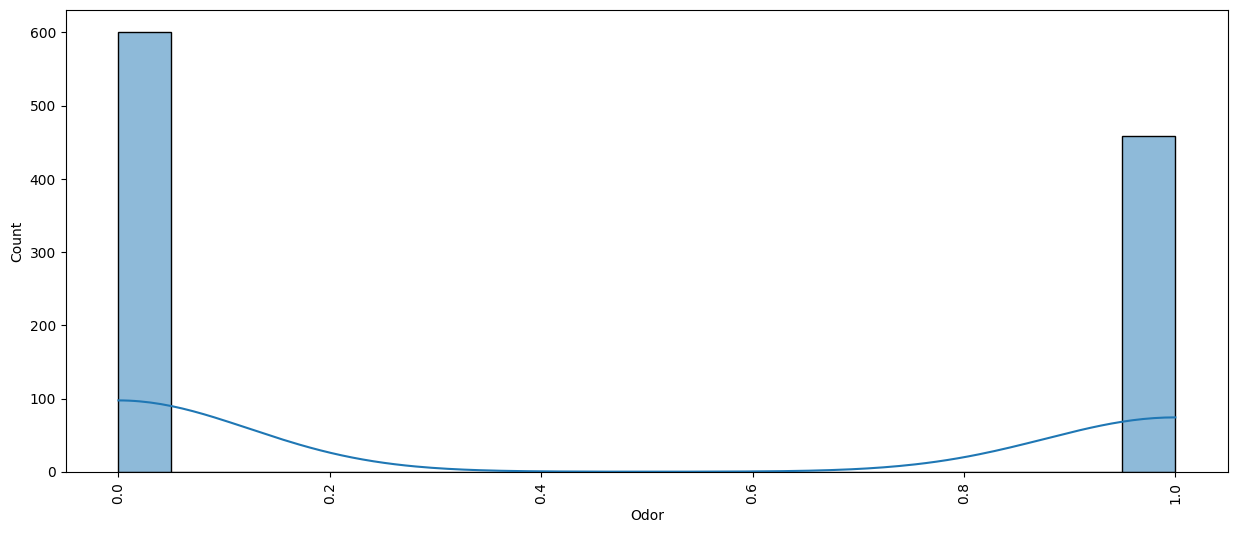

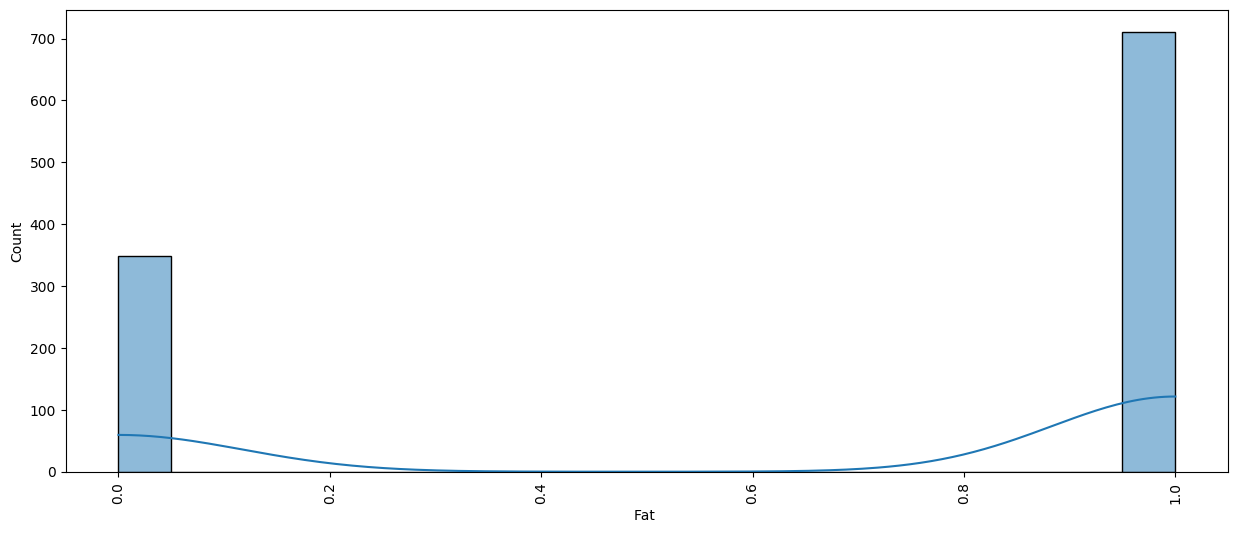

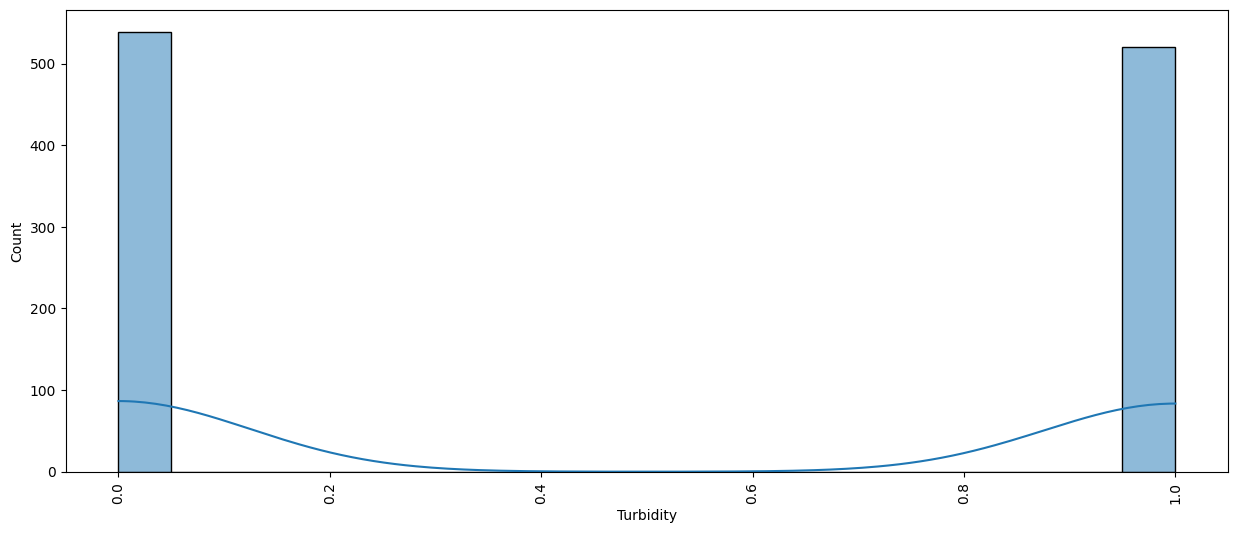

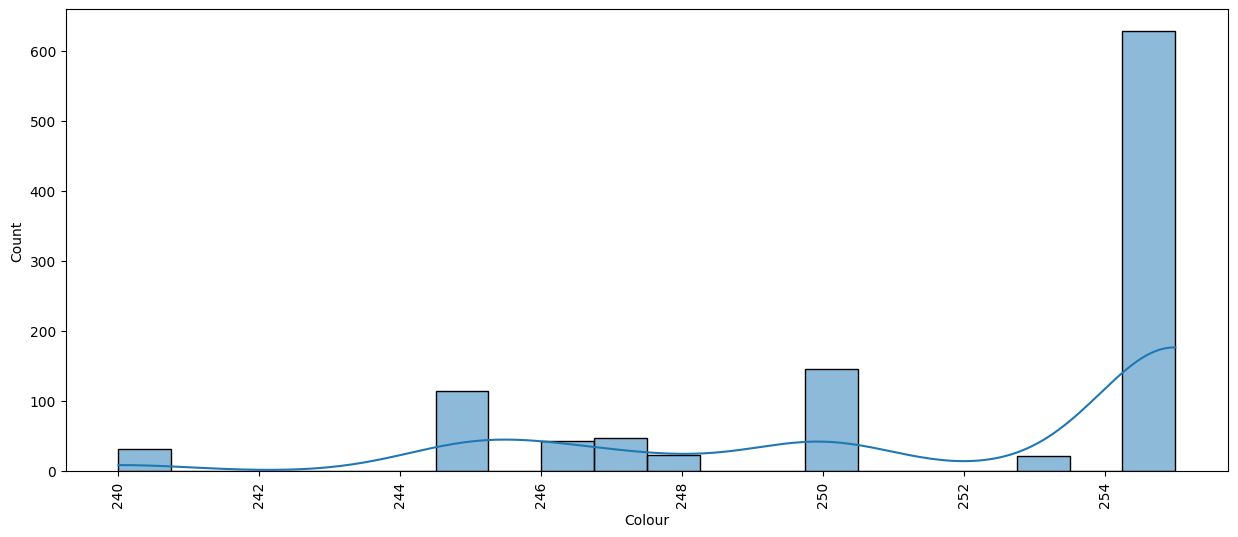

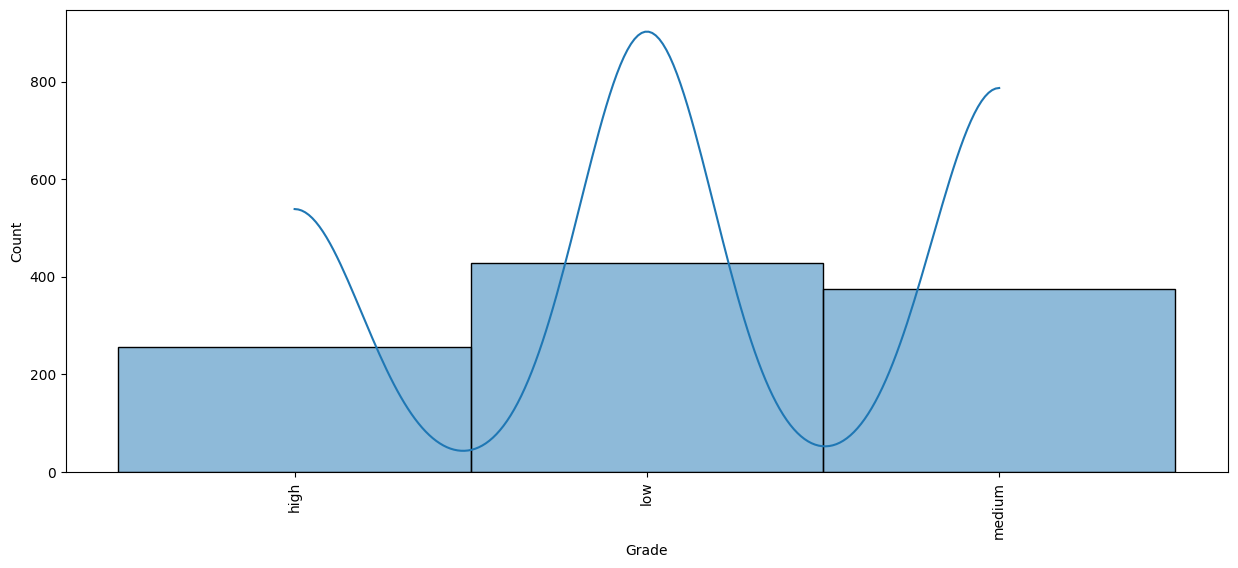

In [22]:
for i in df.columns:
 plt.figure(figsize=(15,6))
 sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
 plt.xticks(rotation = 90)
 plt.show()


In [ ]:
for i in df.columns:
 for j in df.columns:
   plt.figure(figsize=(15,6))
   sns.lineplot(x = df[i], y = df[j], data = df, palette = 'hls')
   plt.xticks(rotation = 90)
   plt.show()

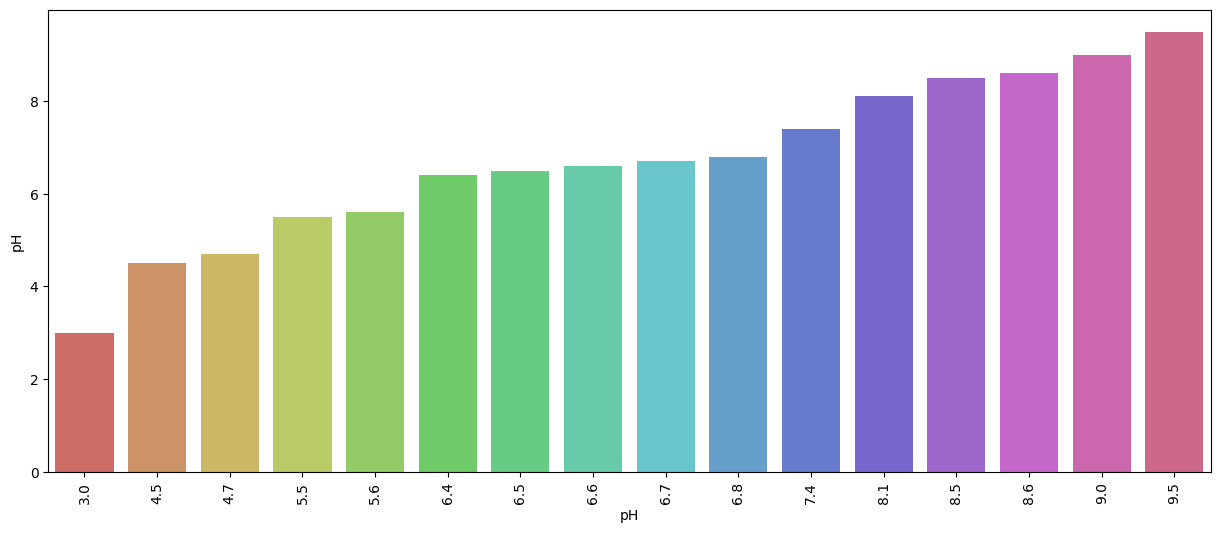

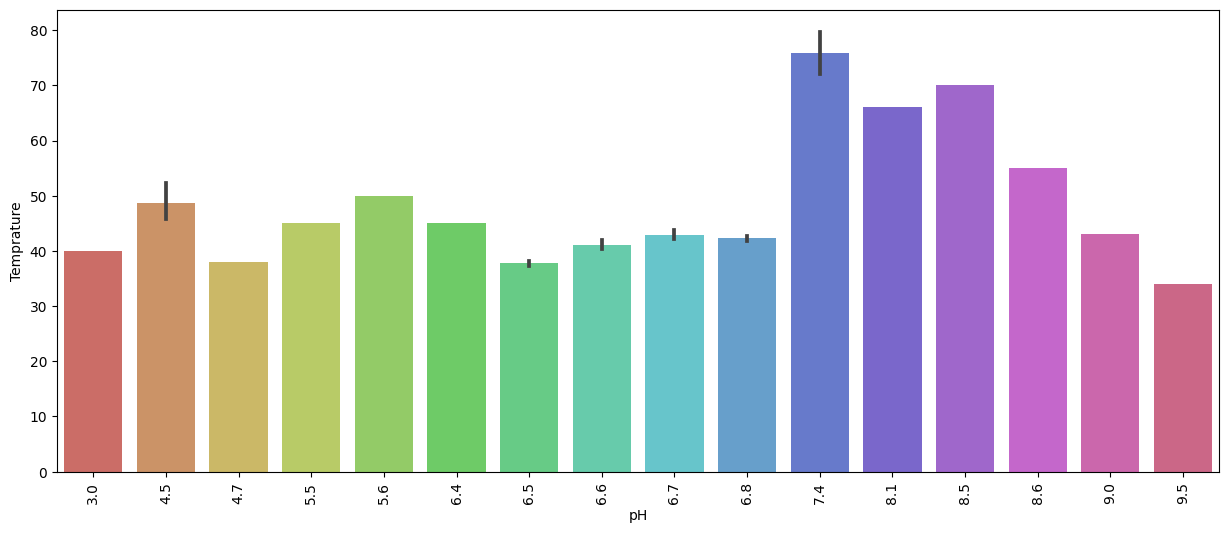

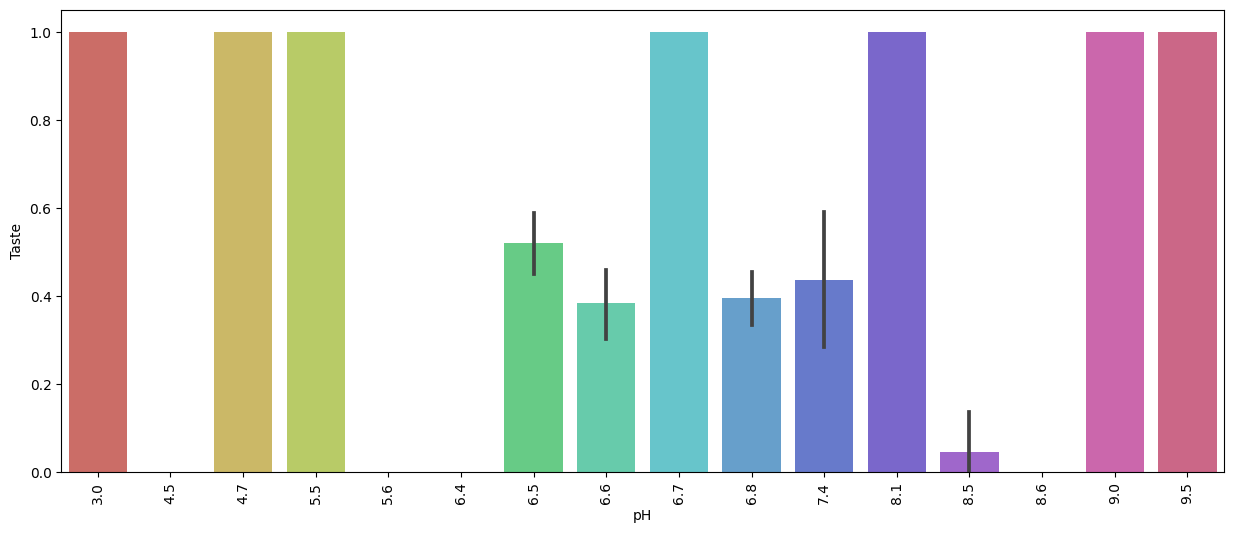

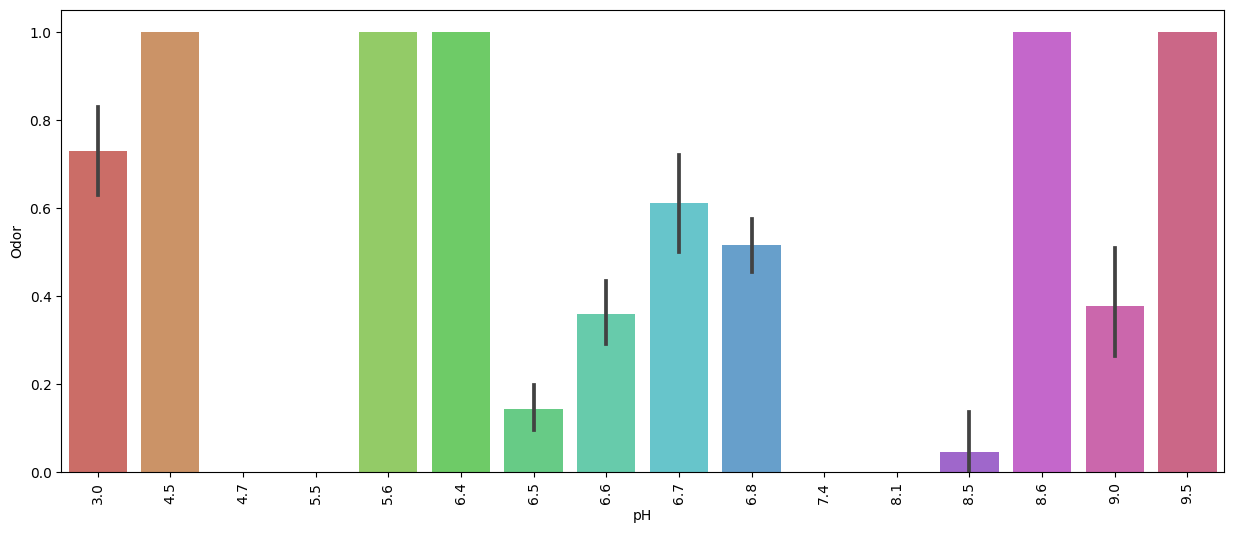

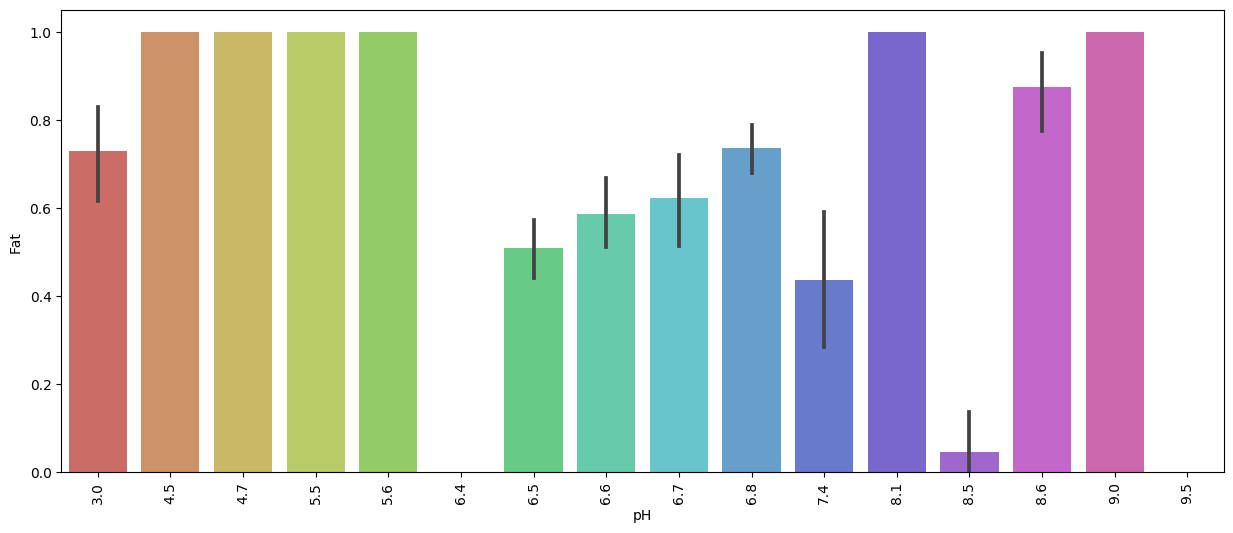

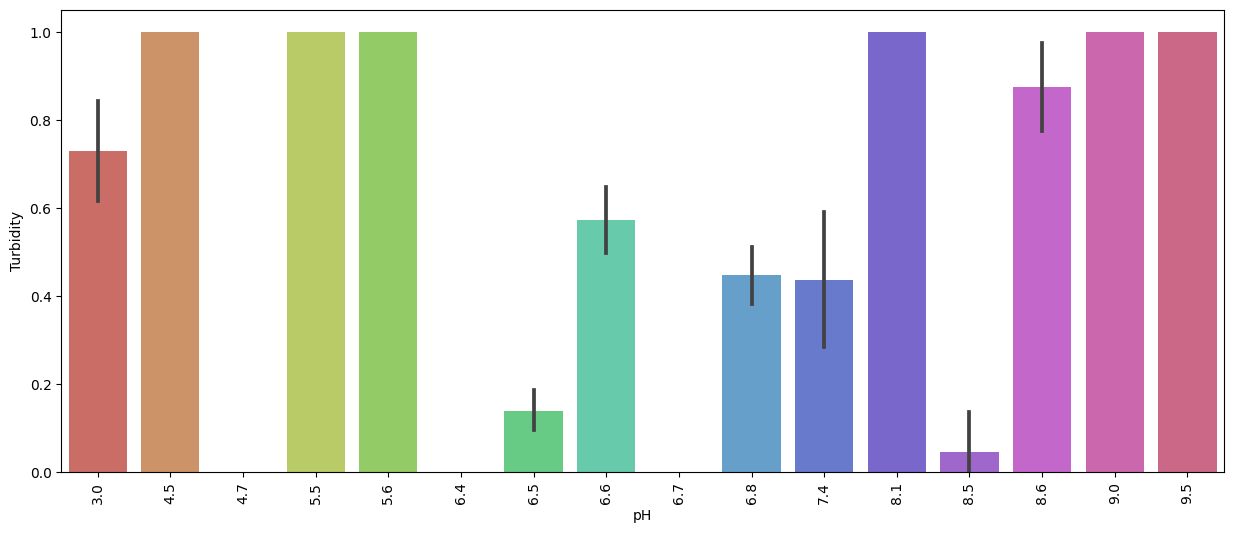

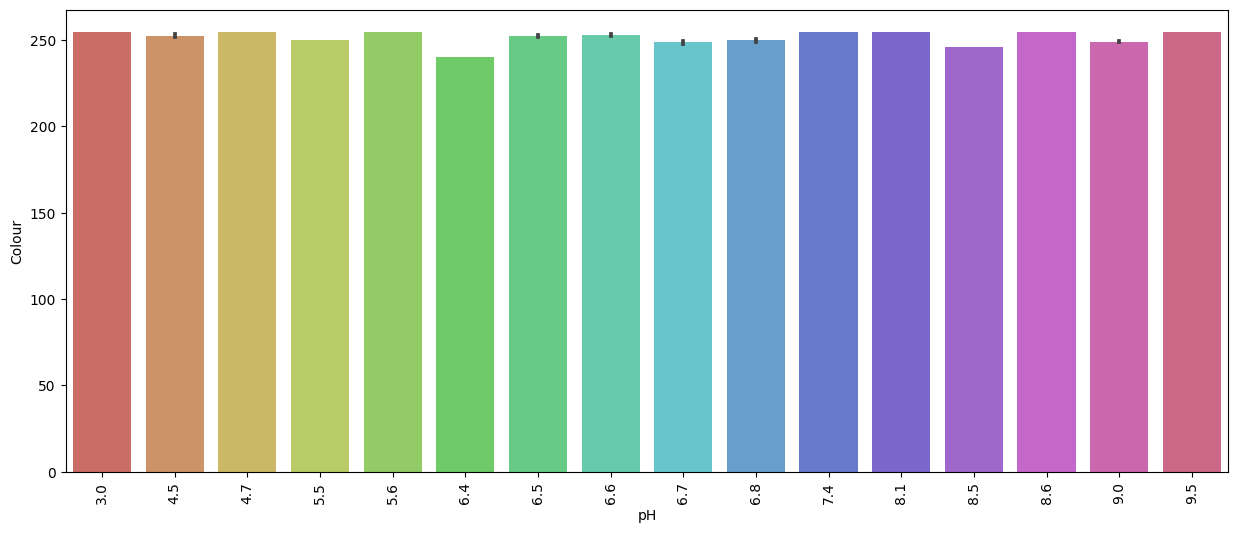

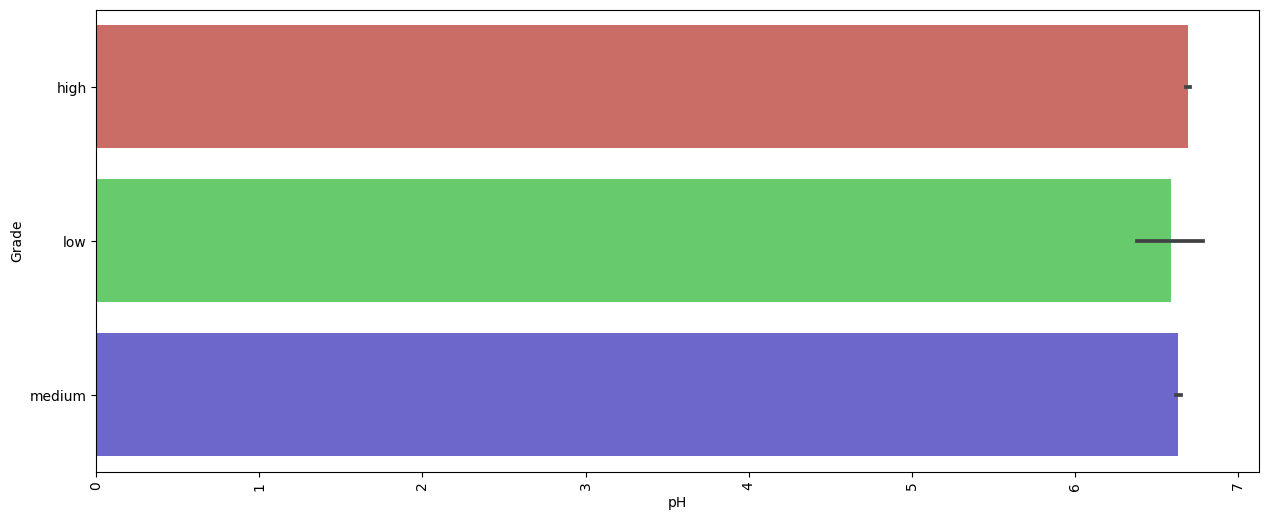

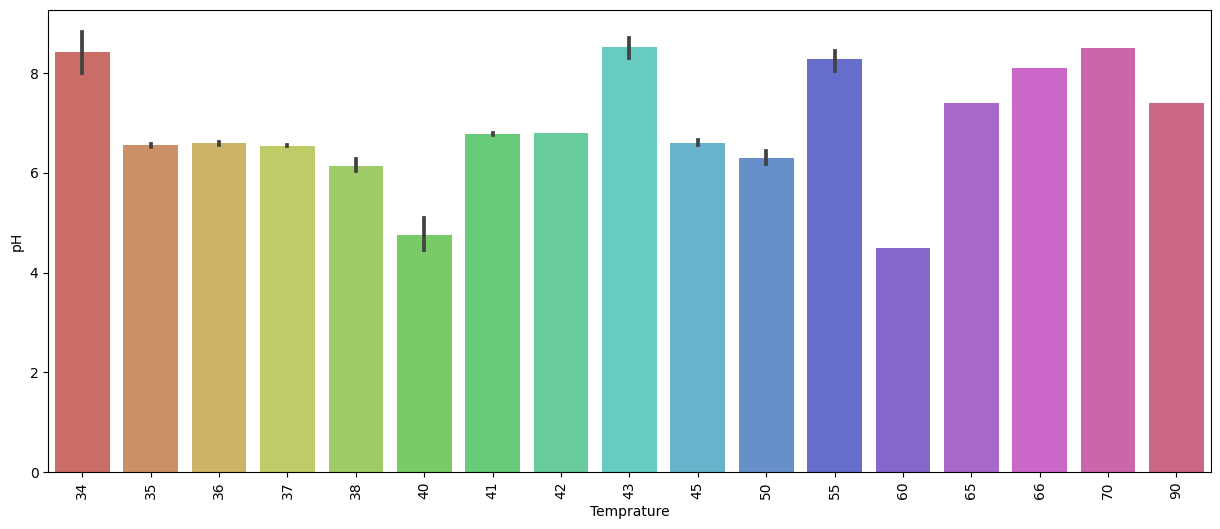

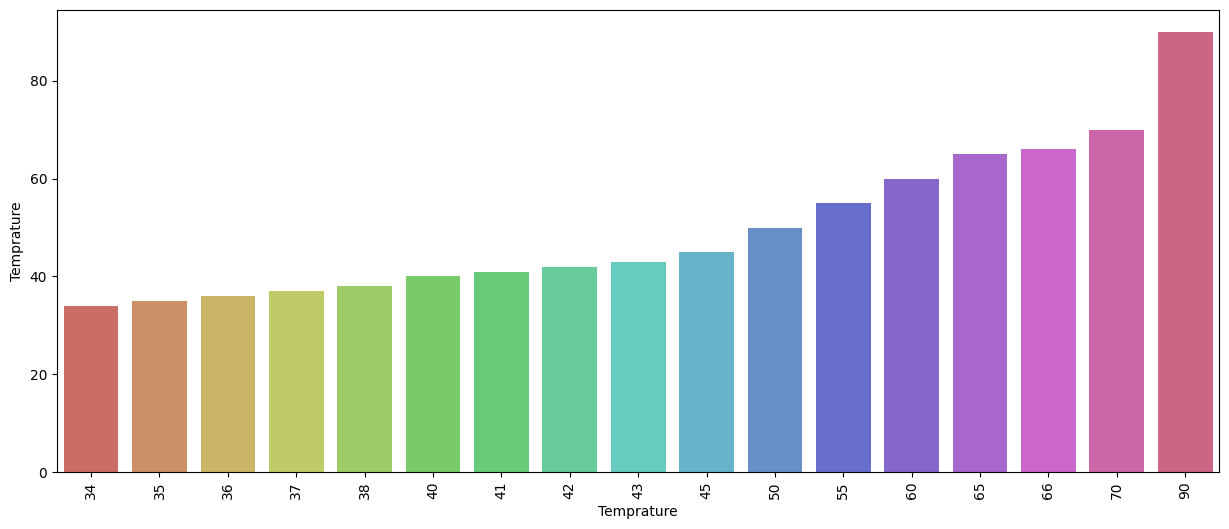

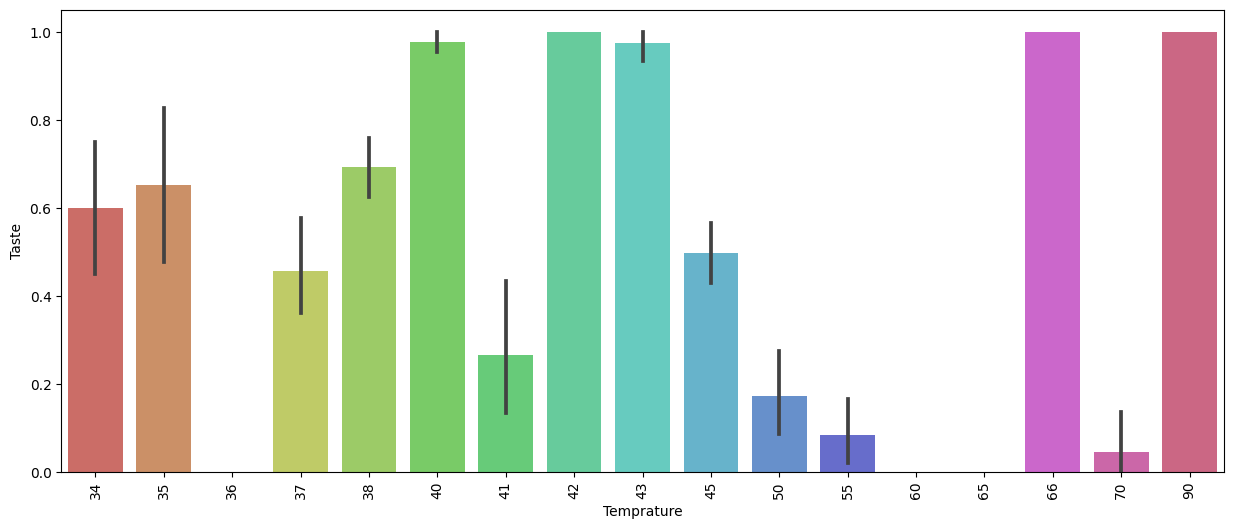

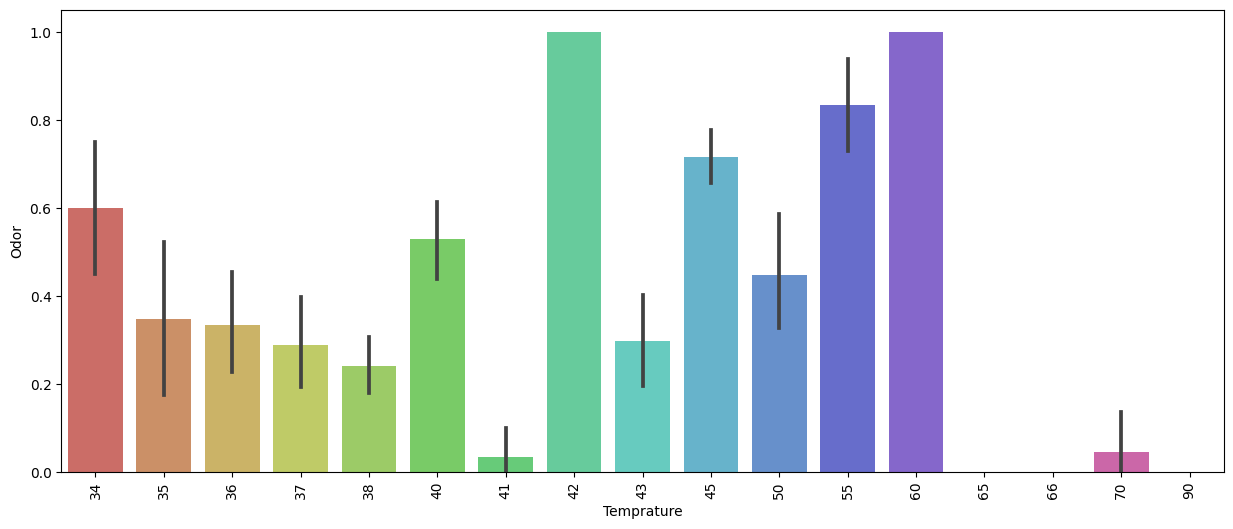

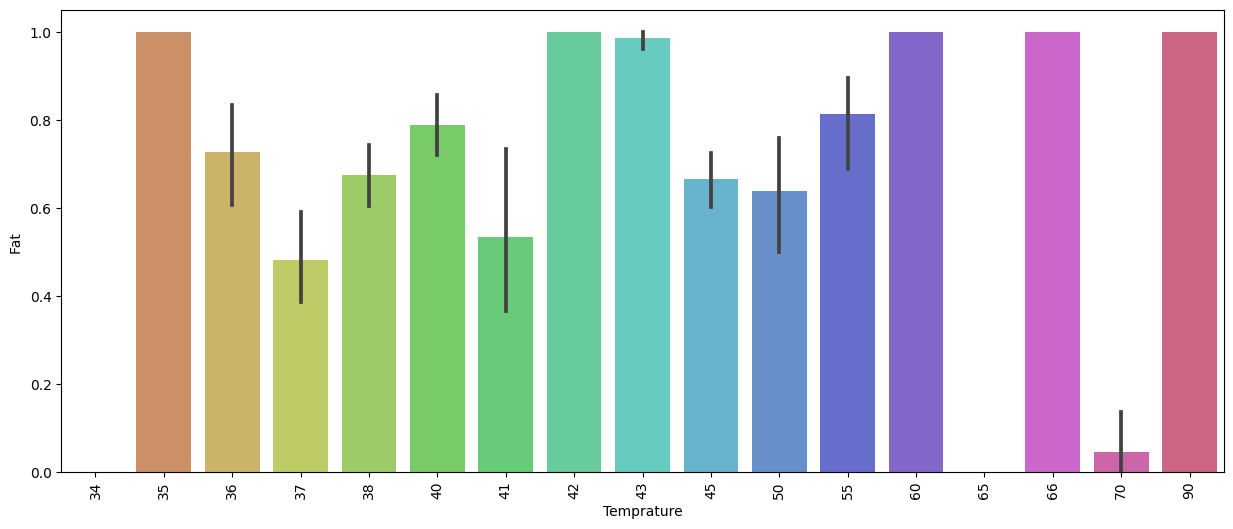

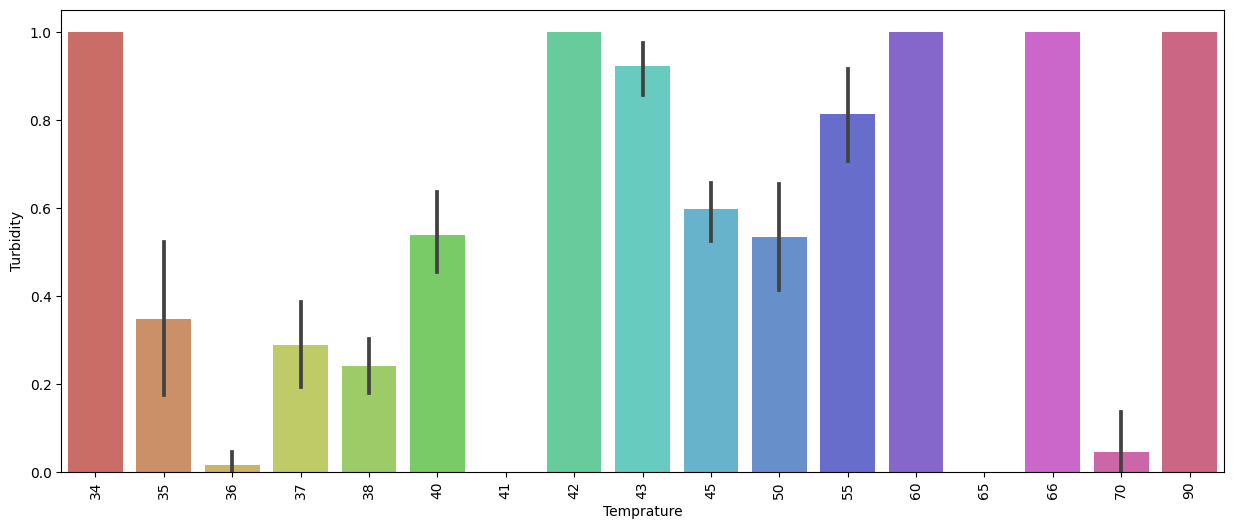

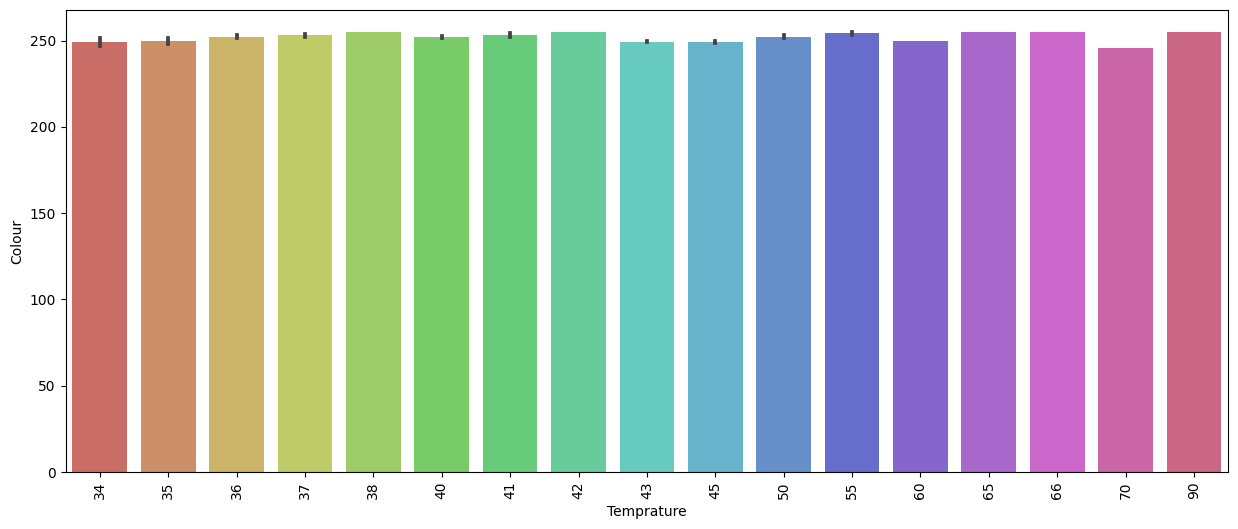

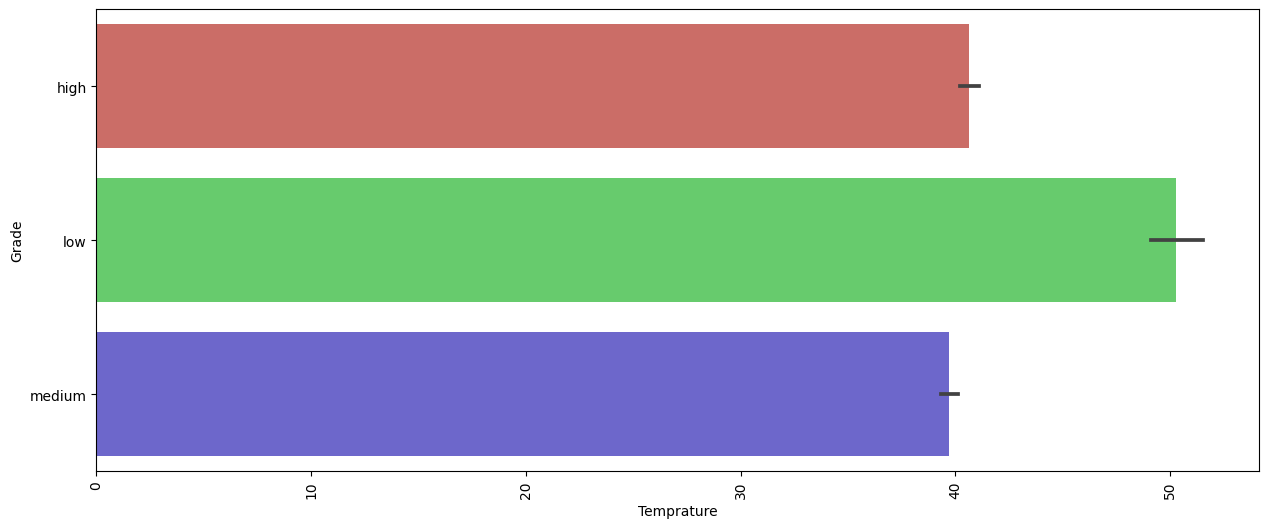

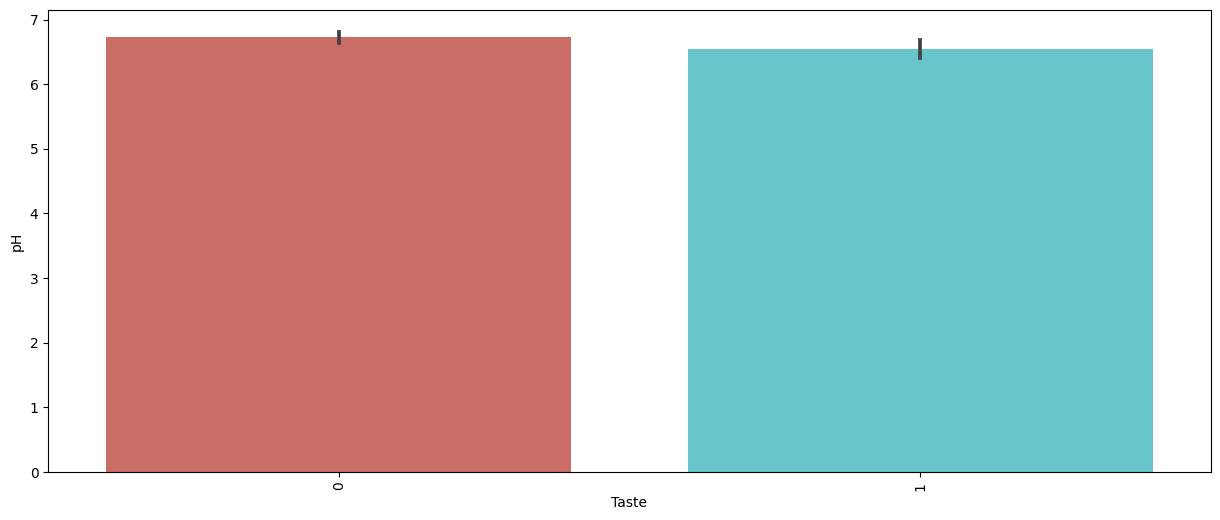

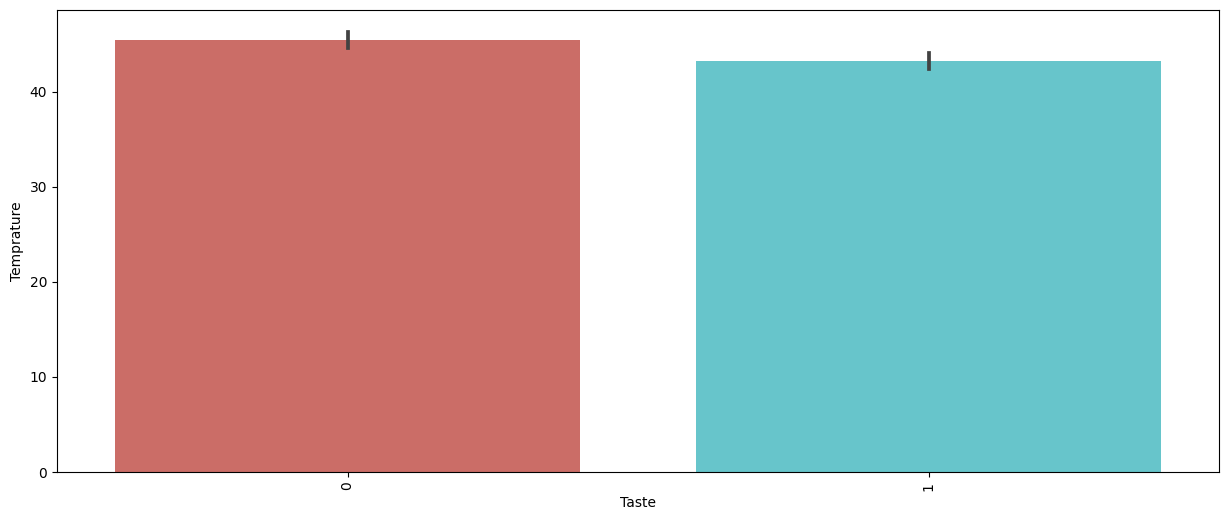

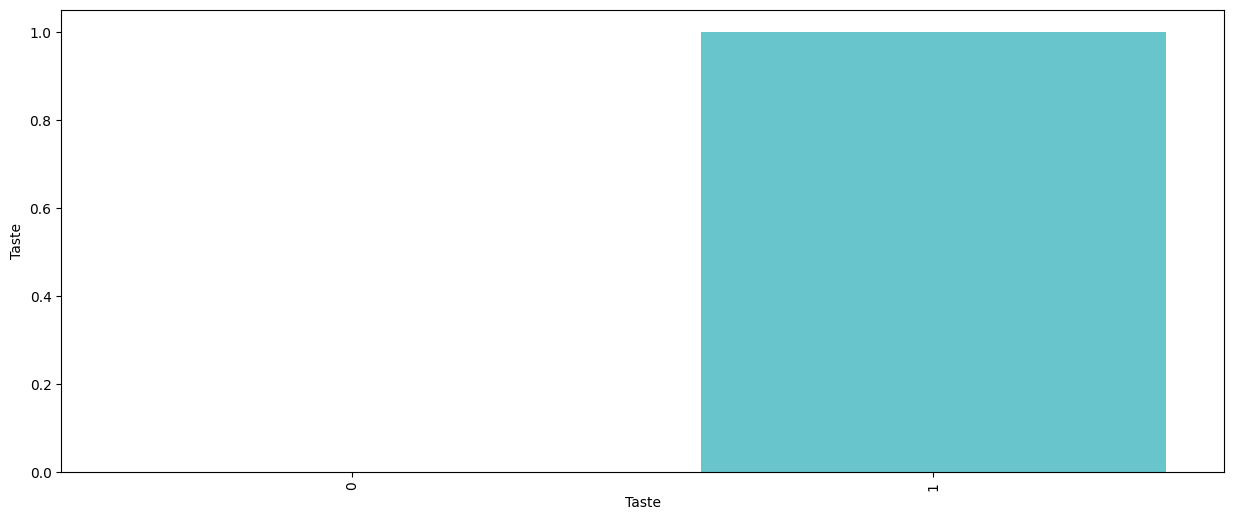

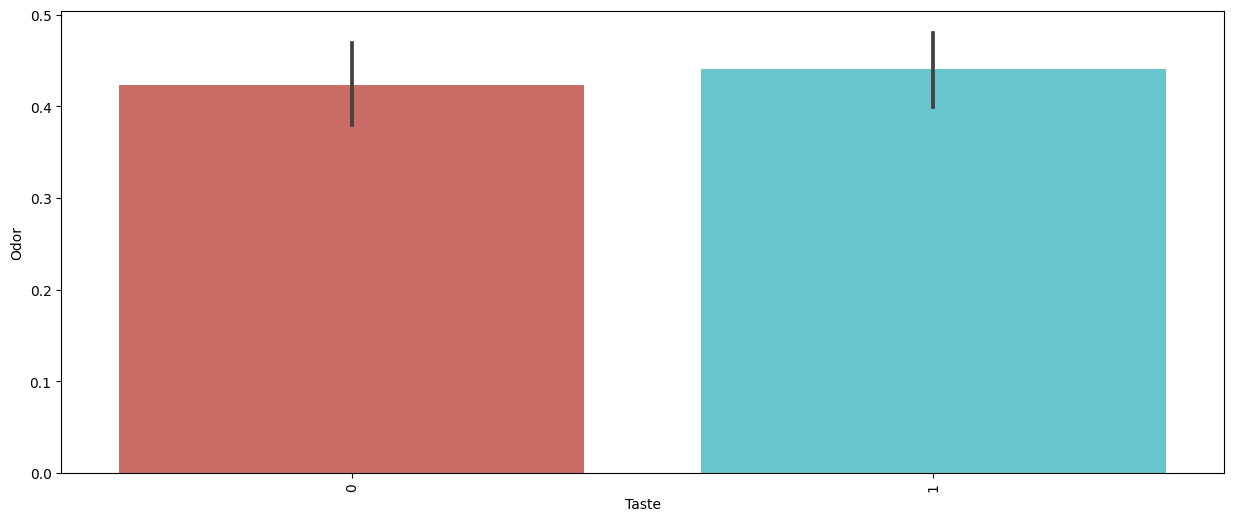

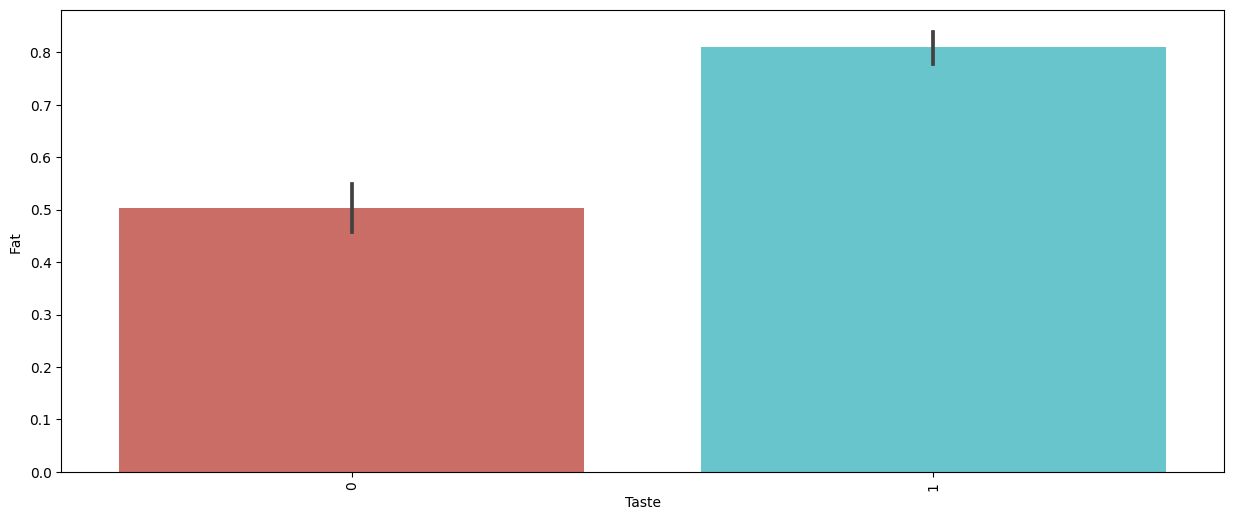

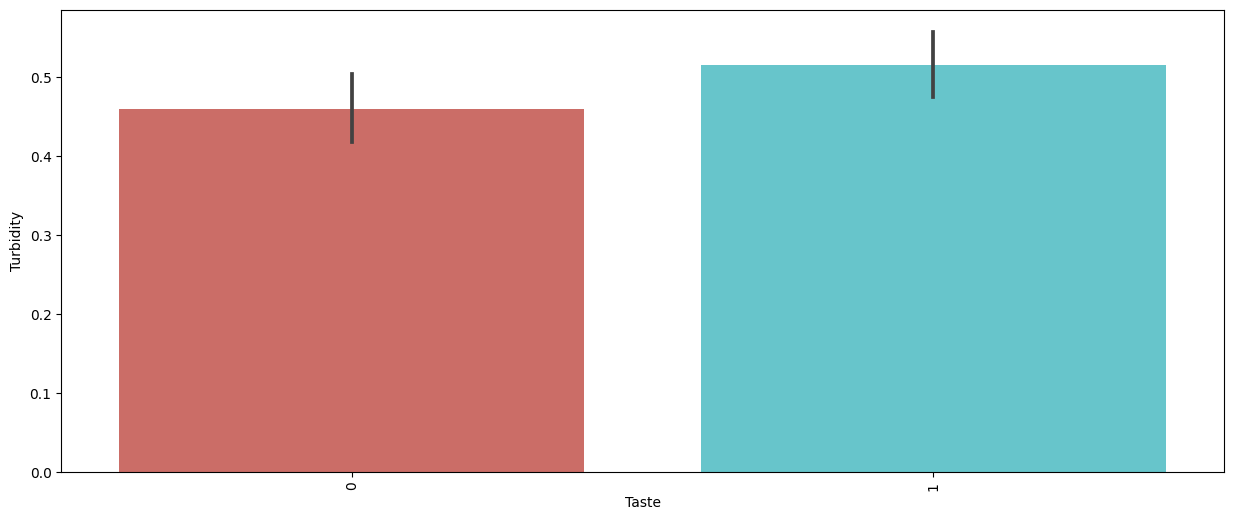

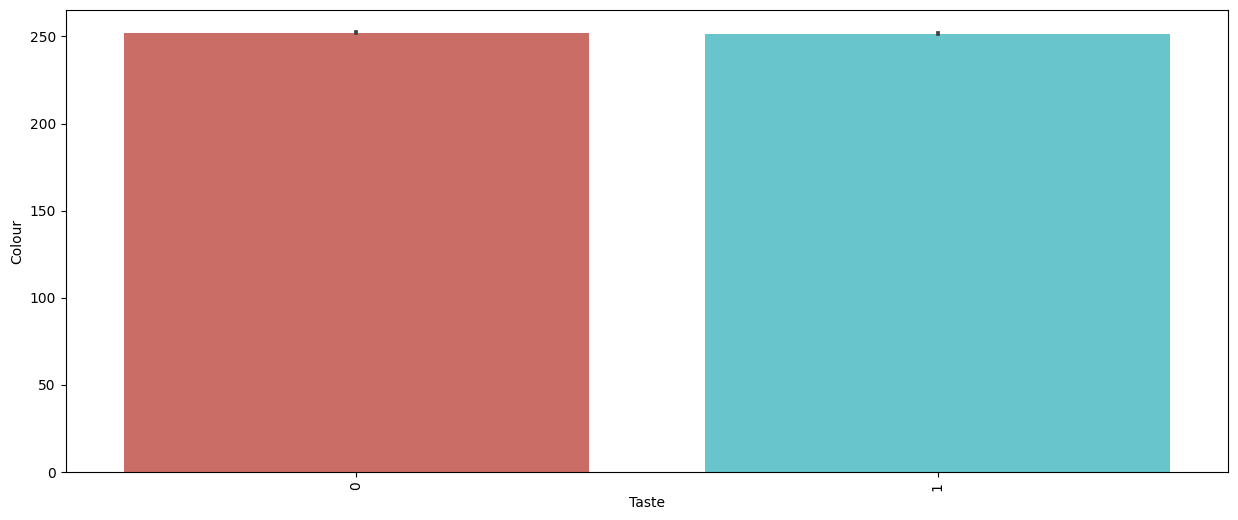

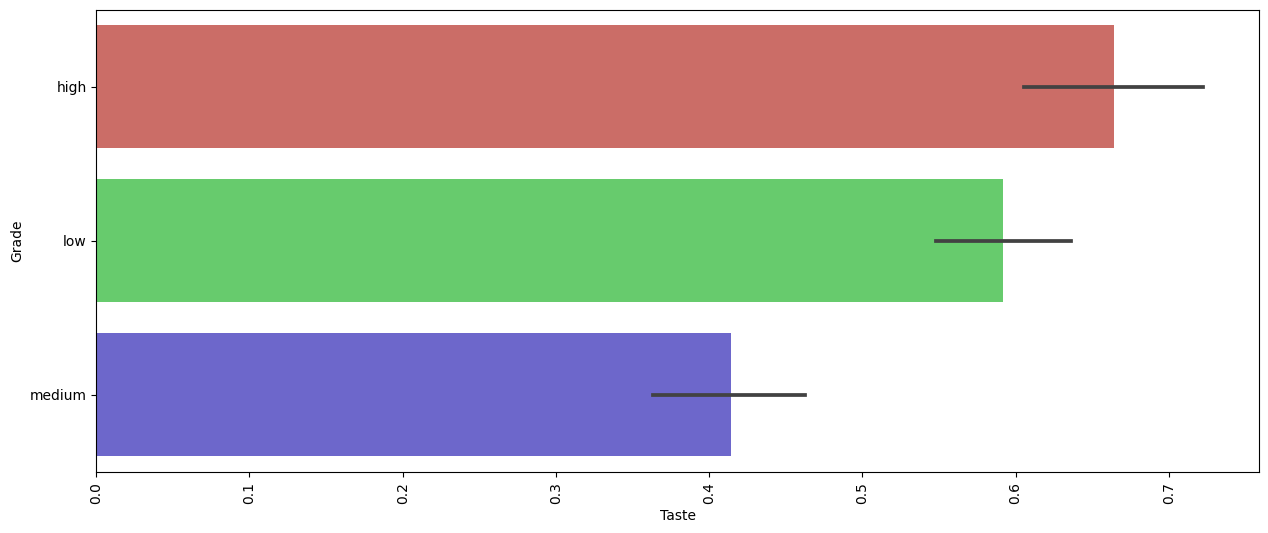

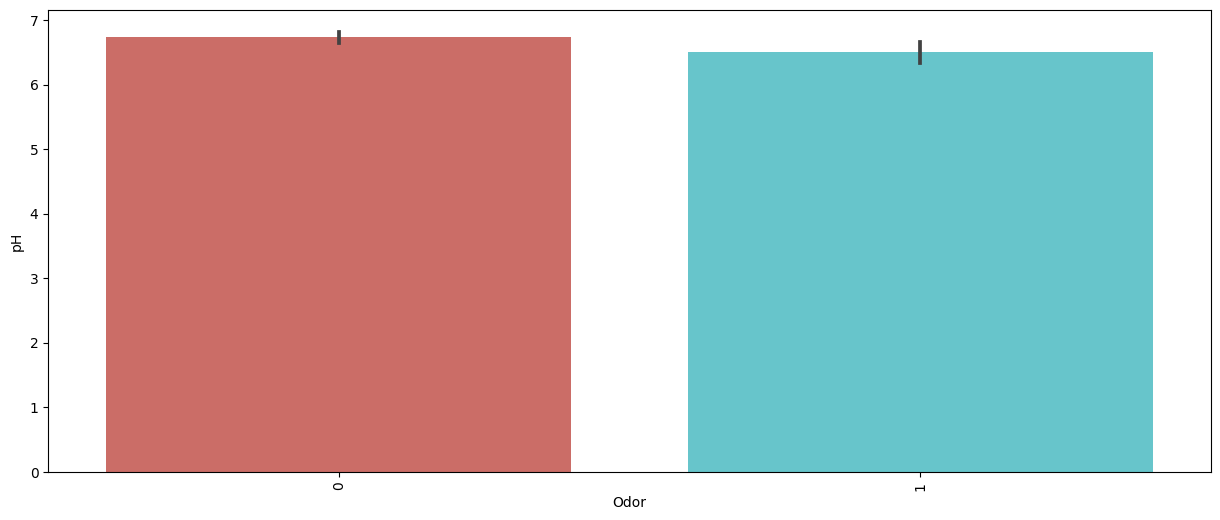

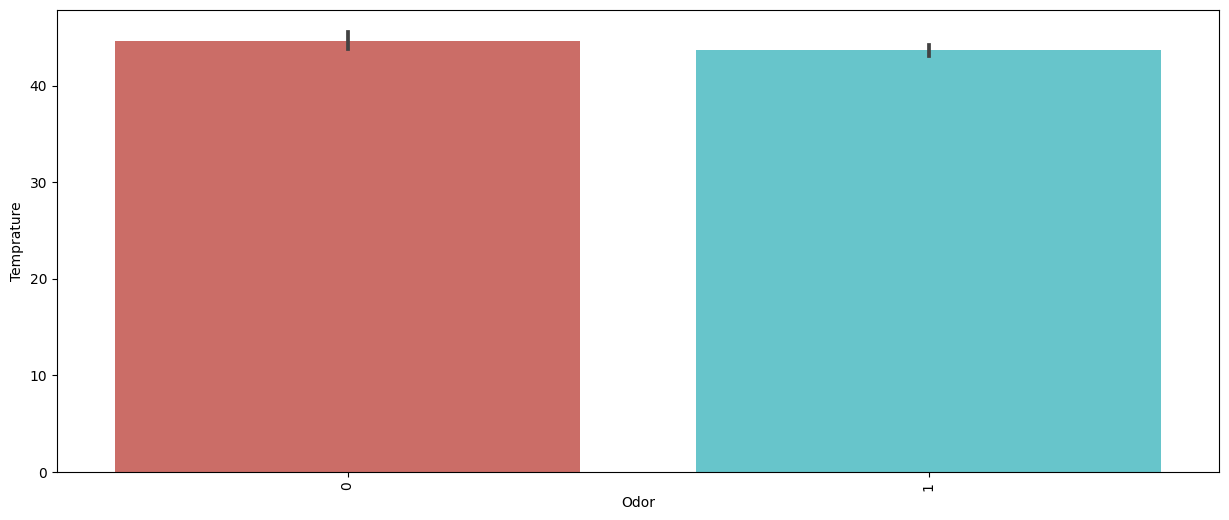

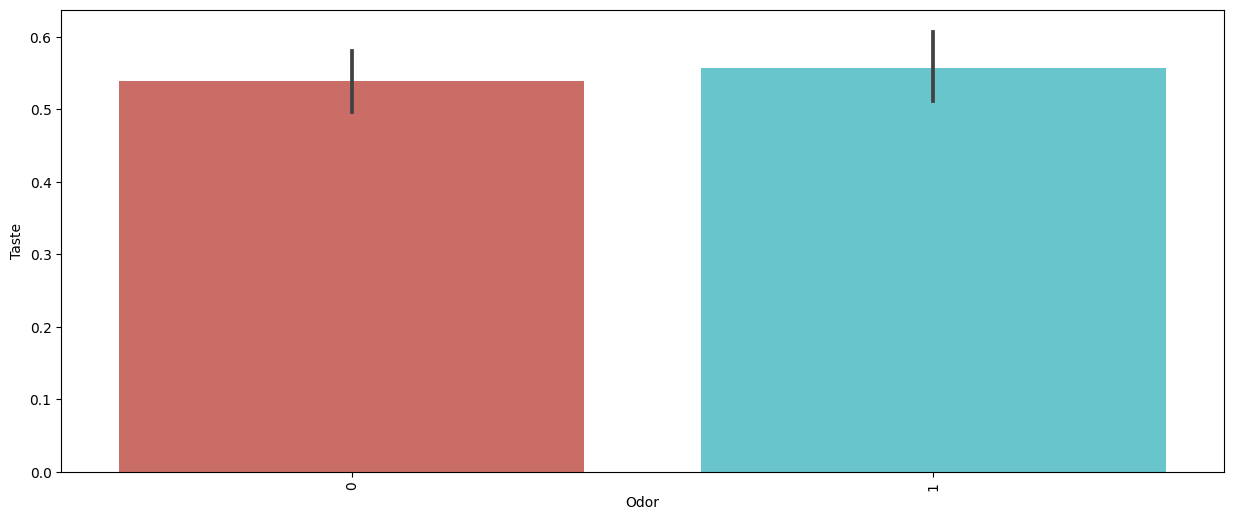

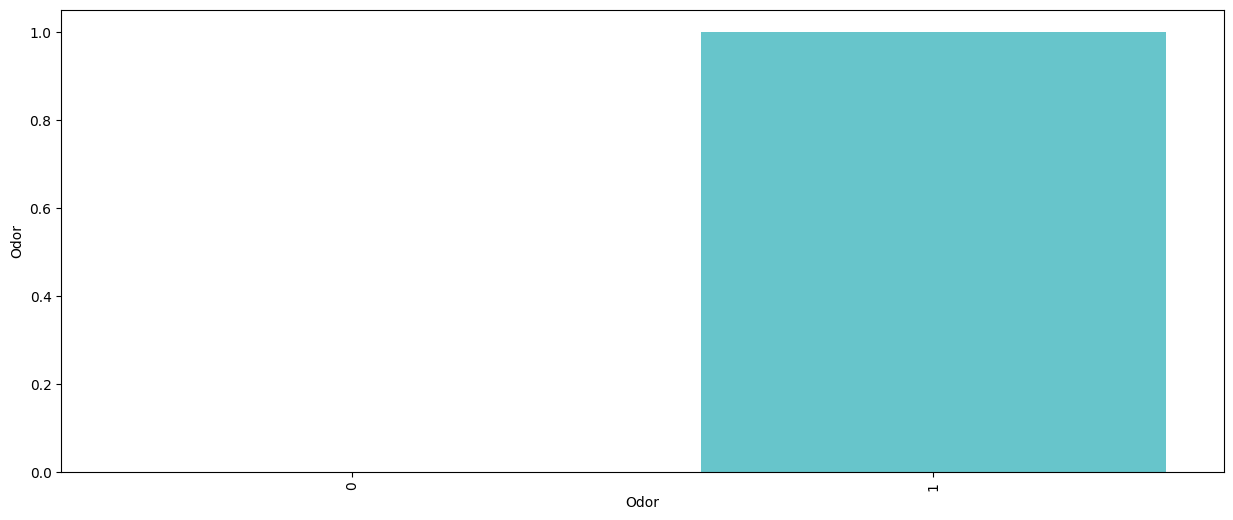

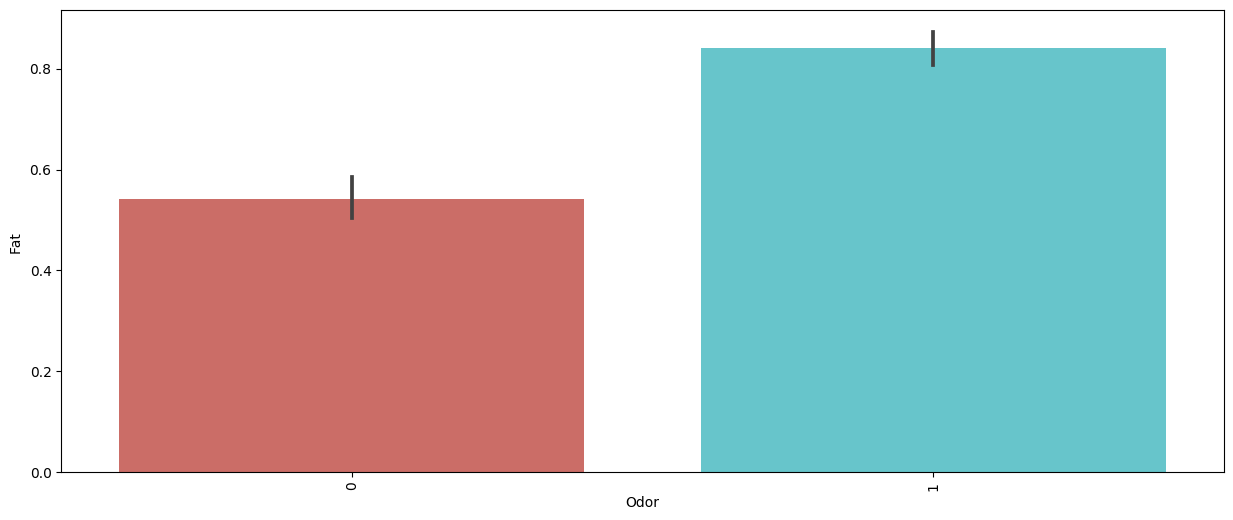

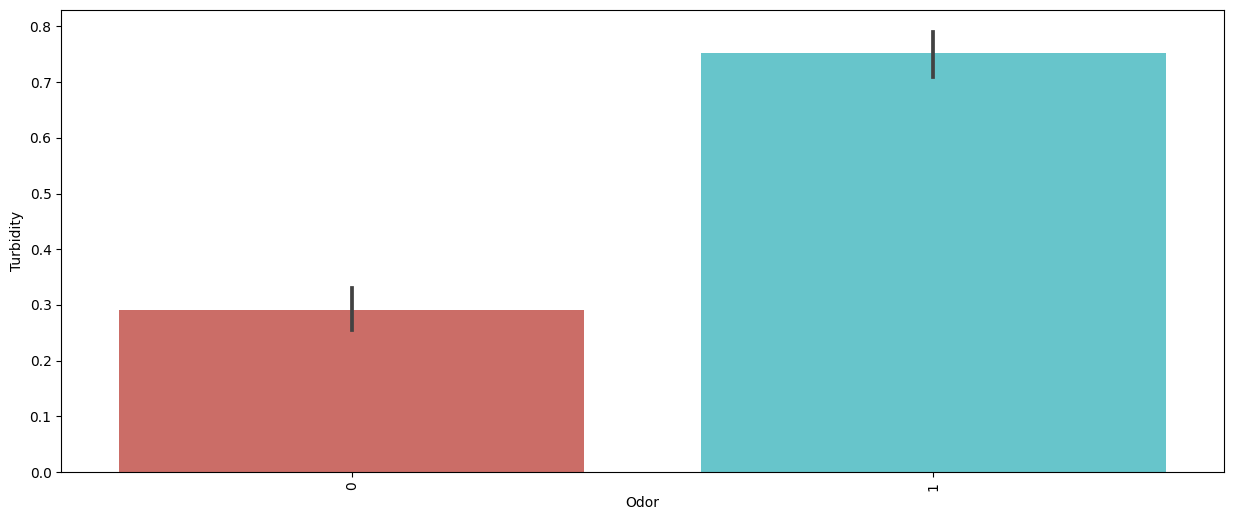

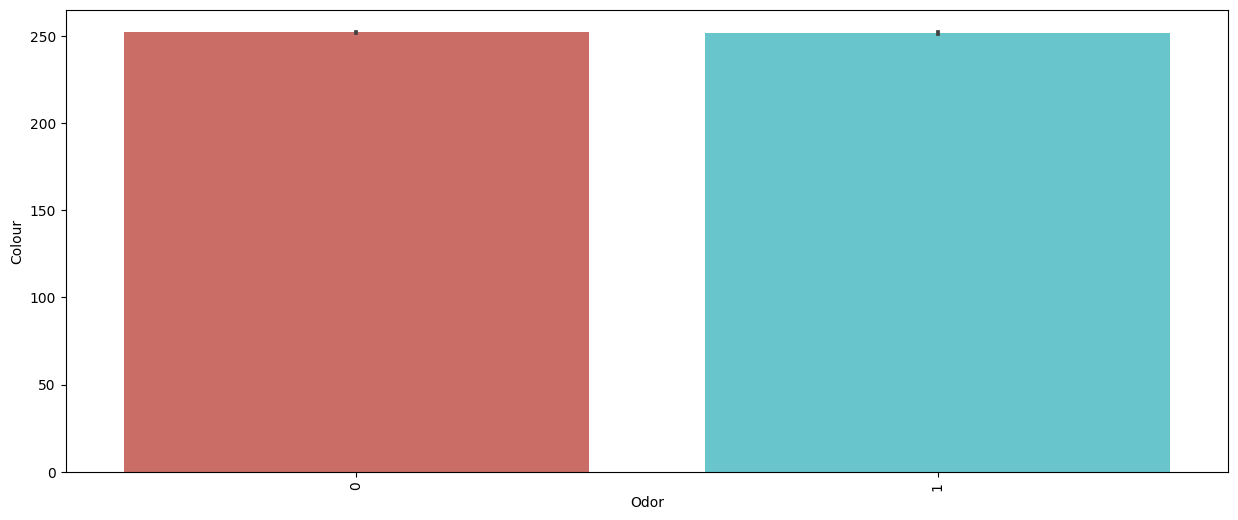

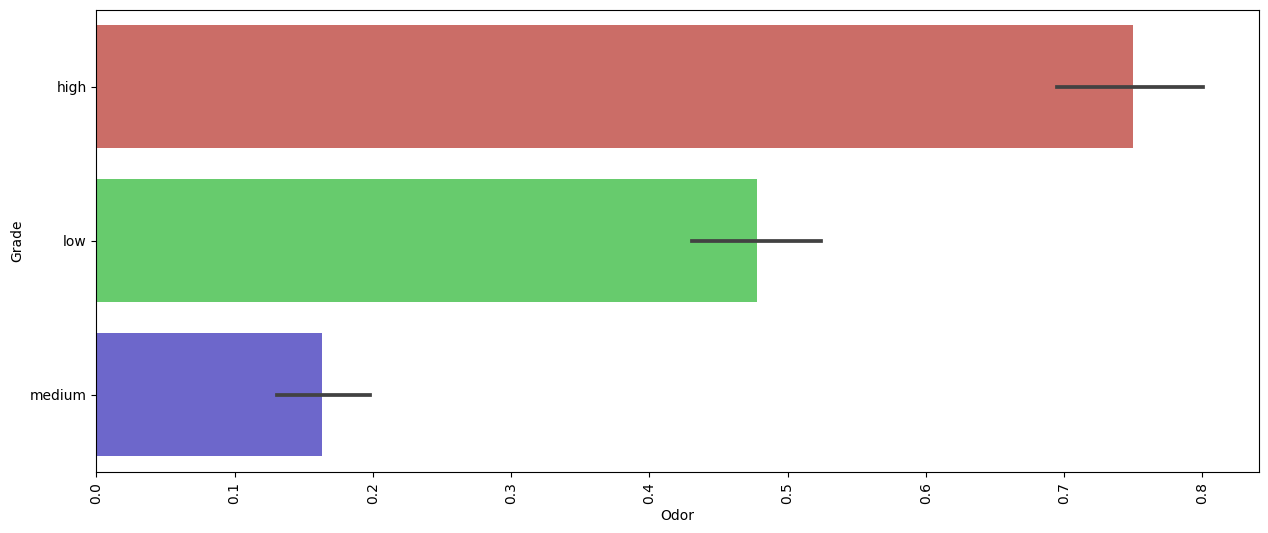

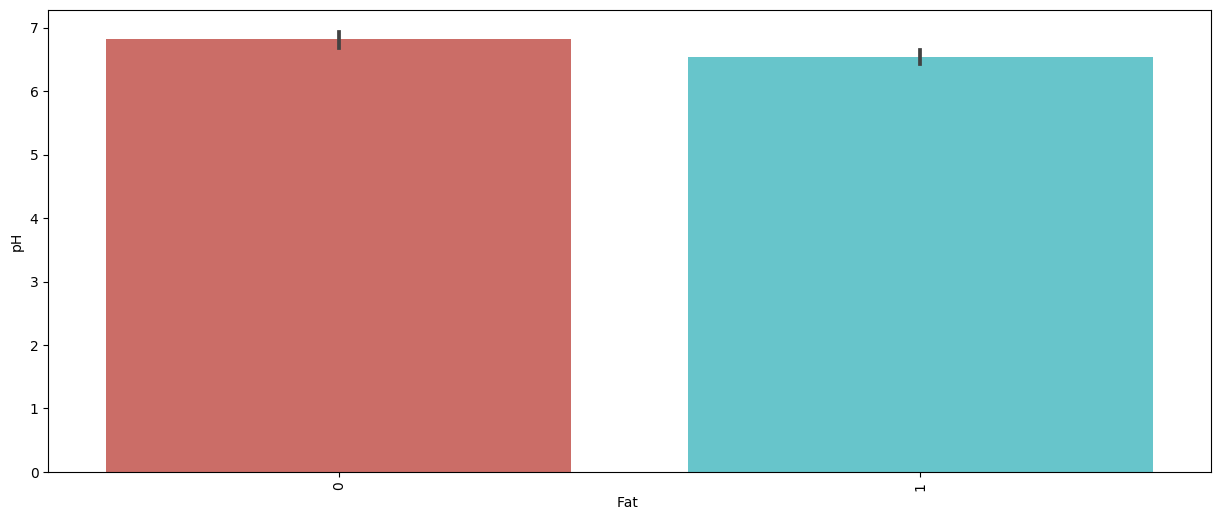

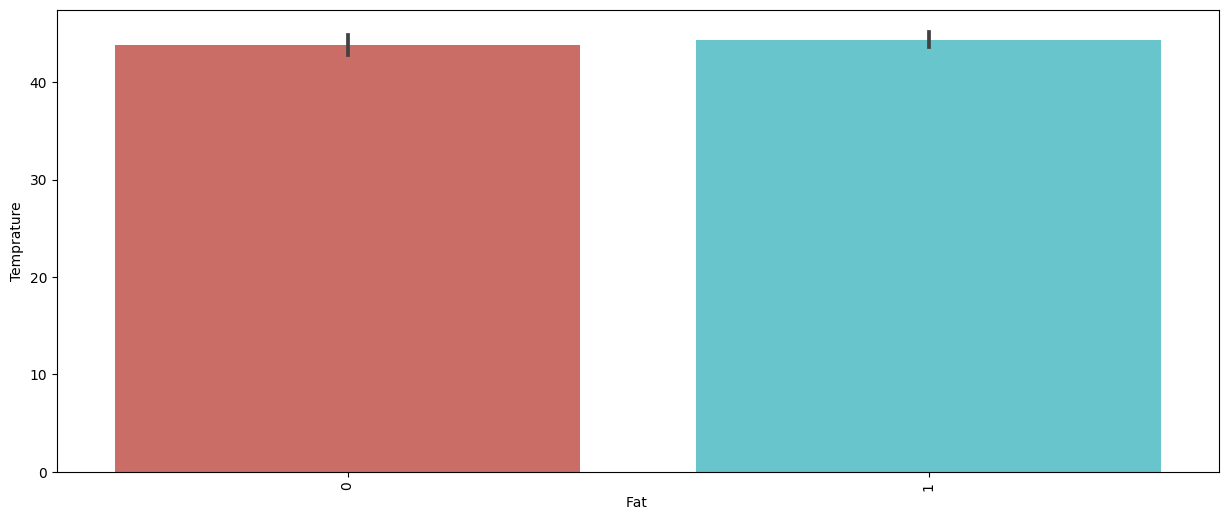

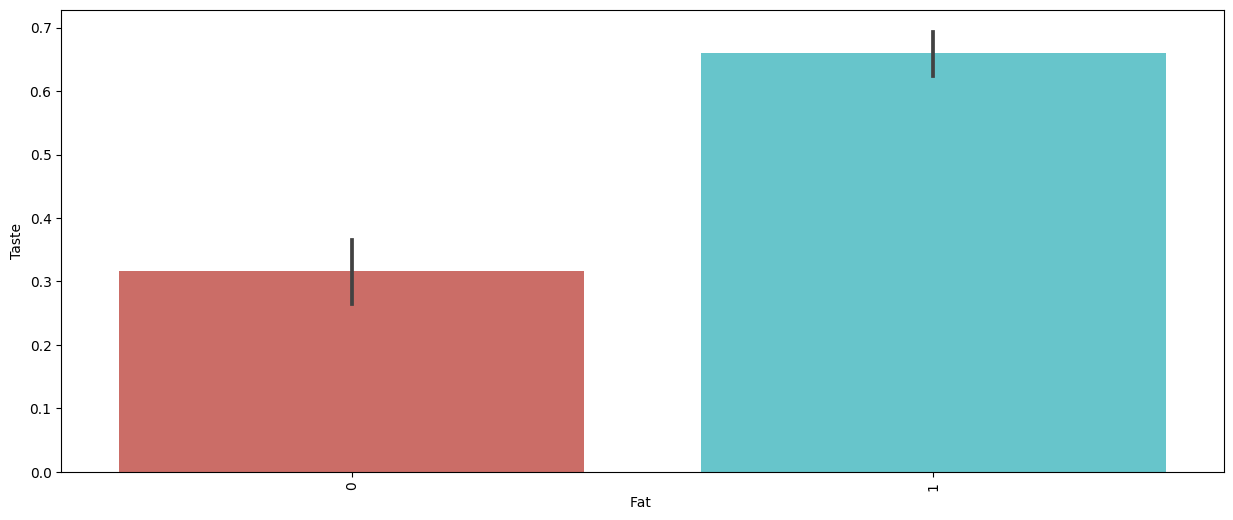

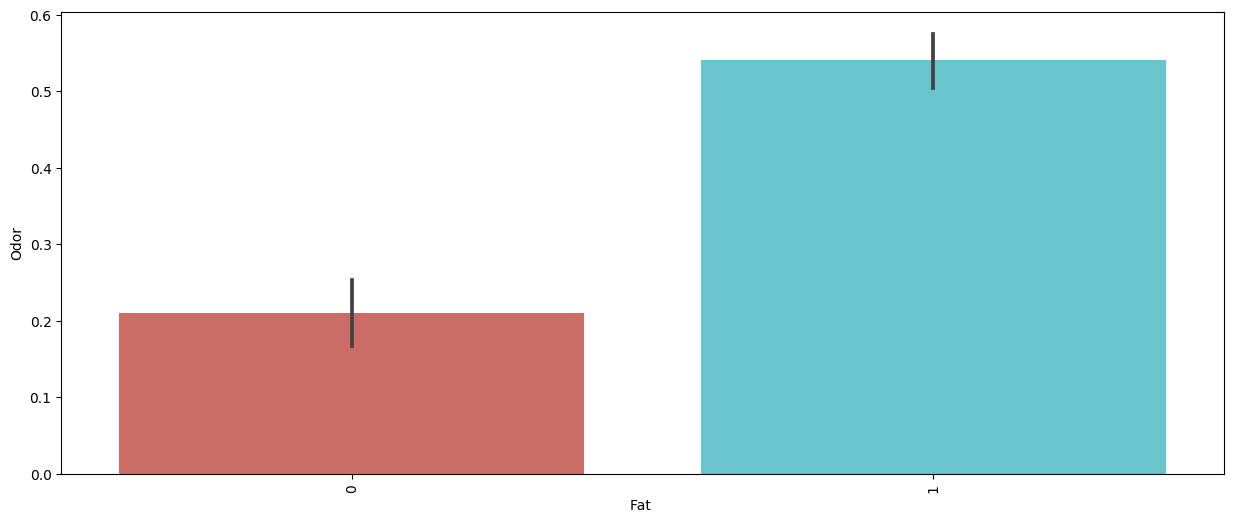

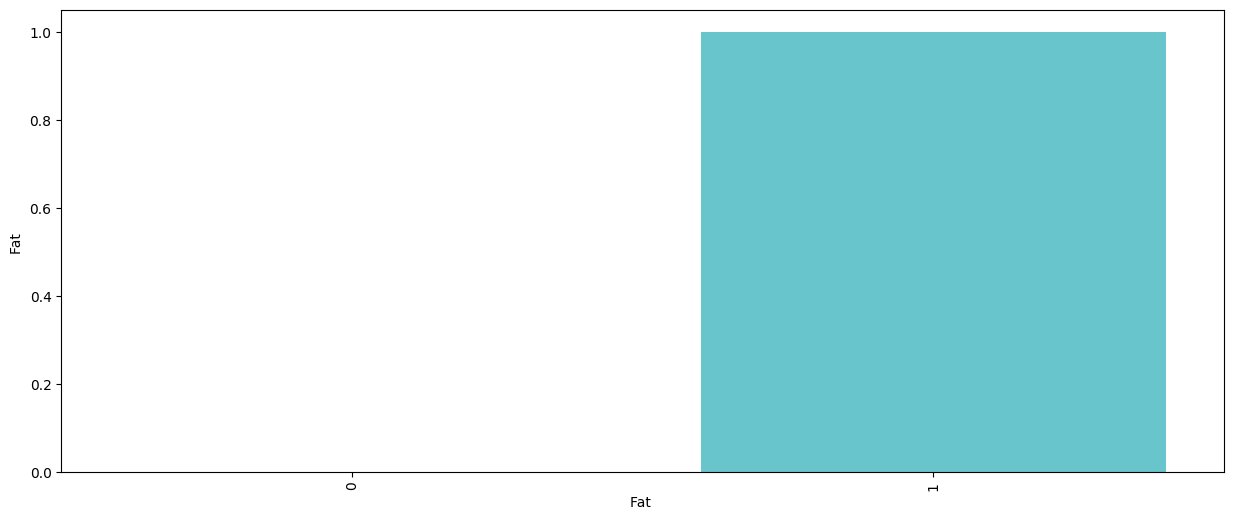

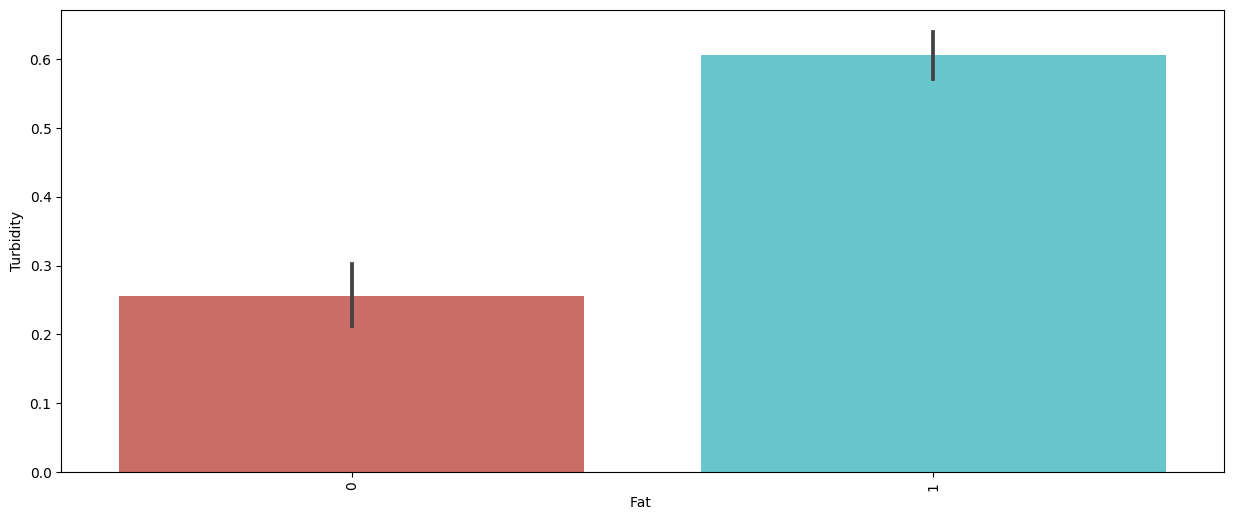

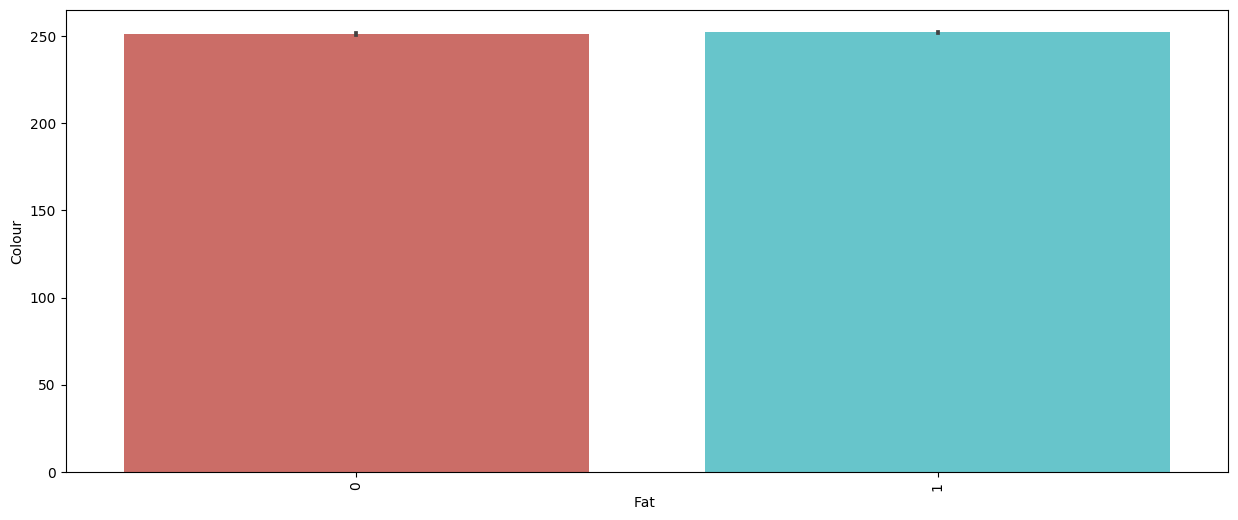

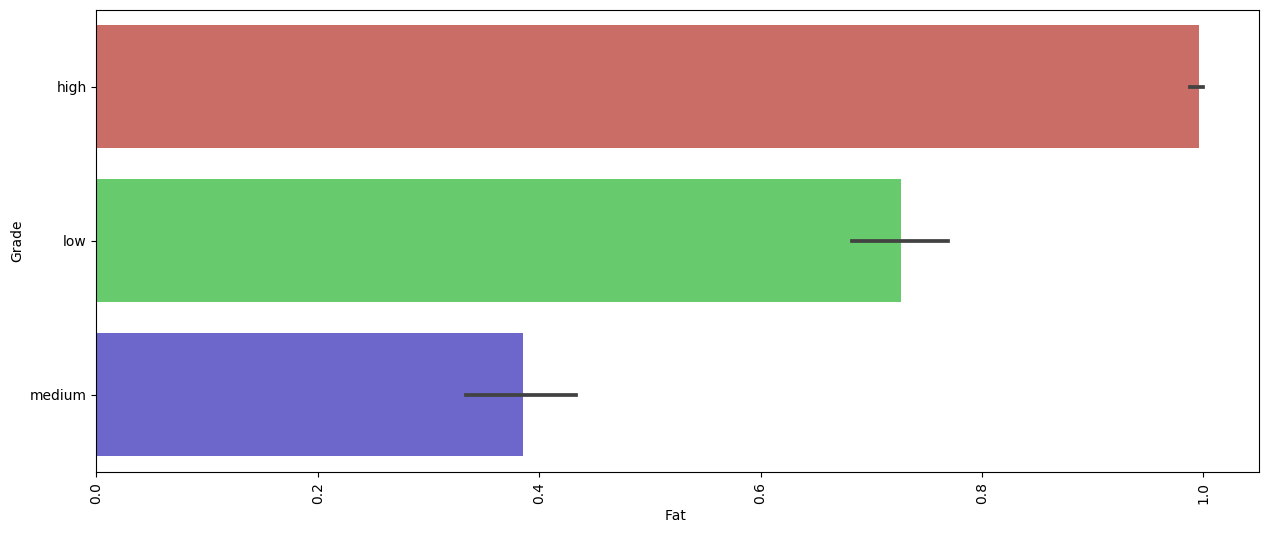

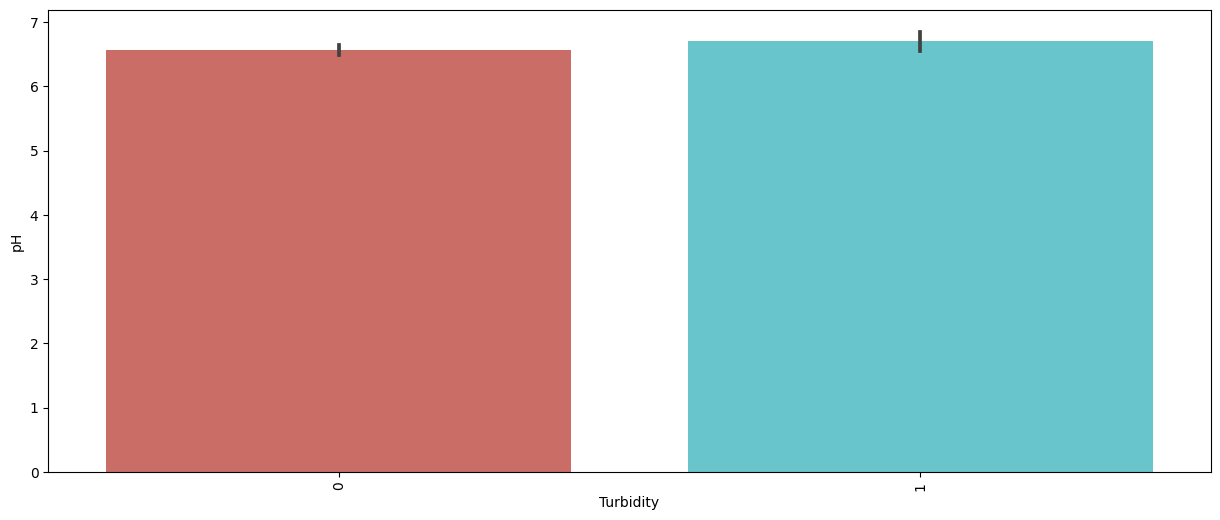

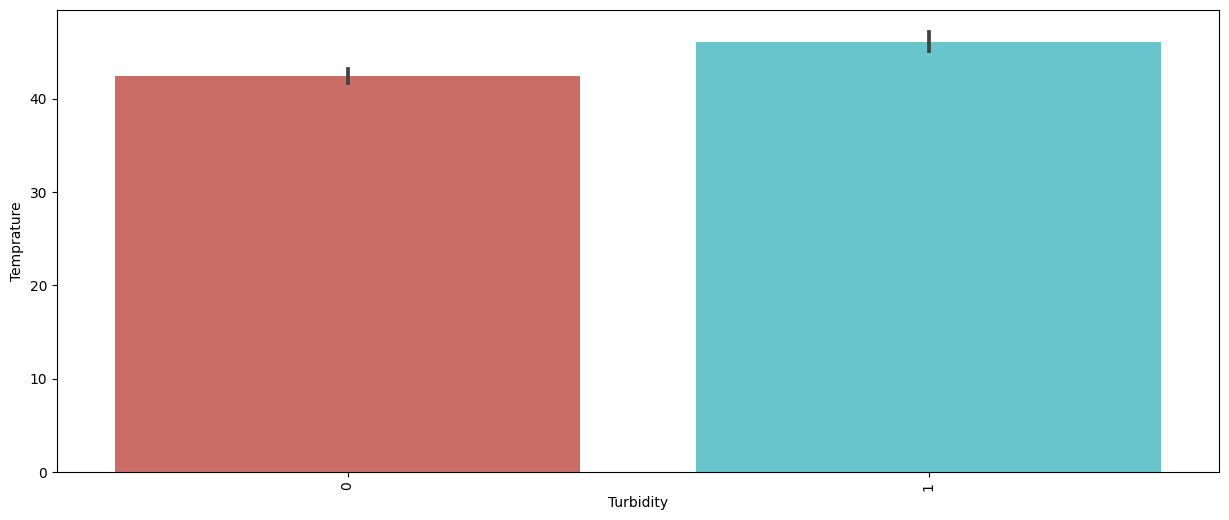

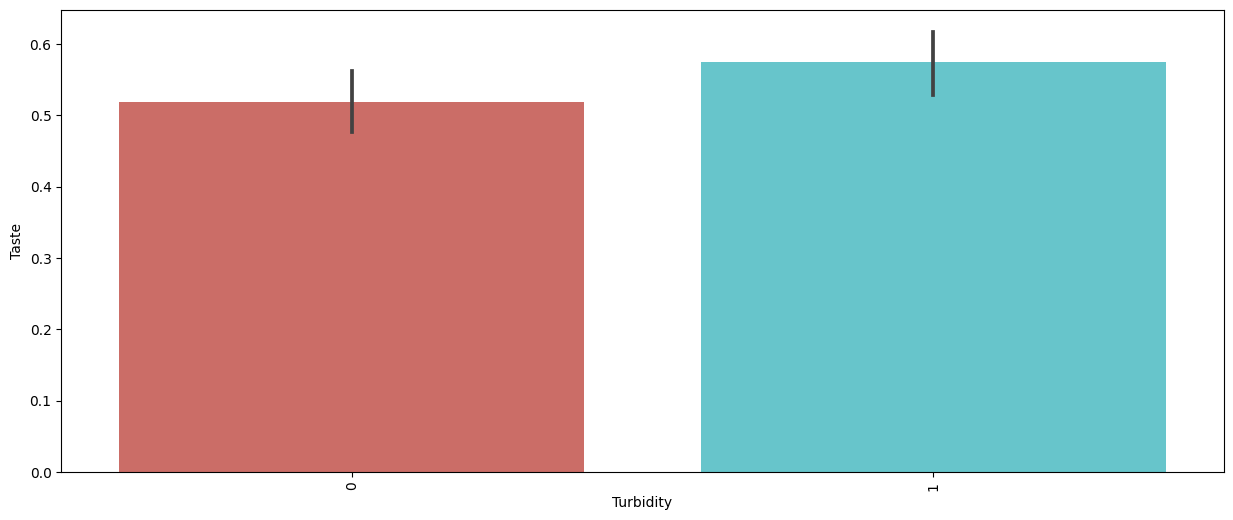

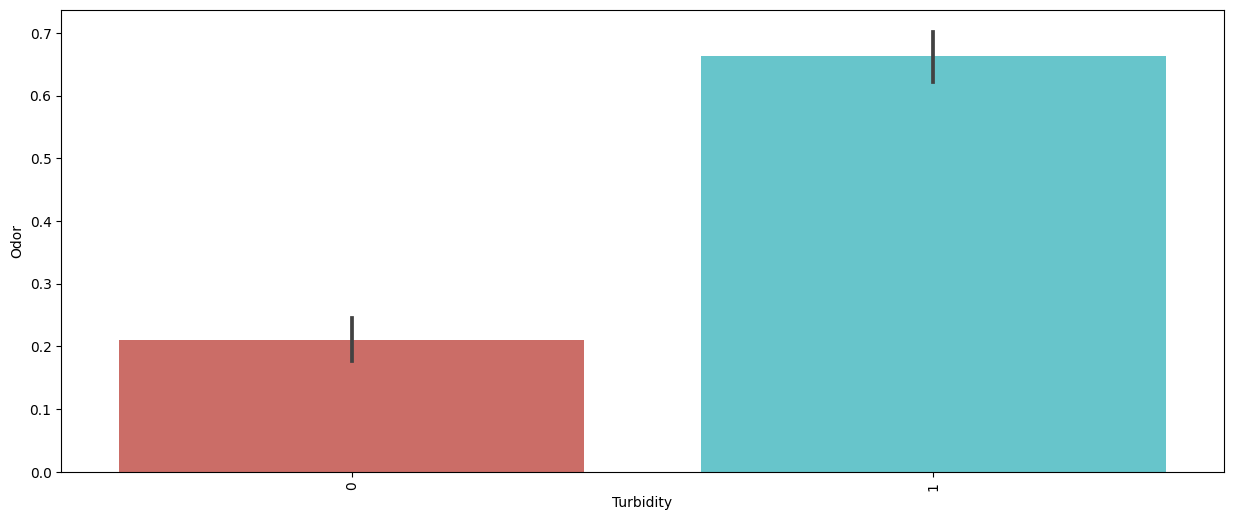

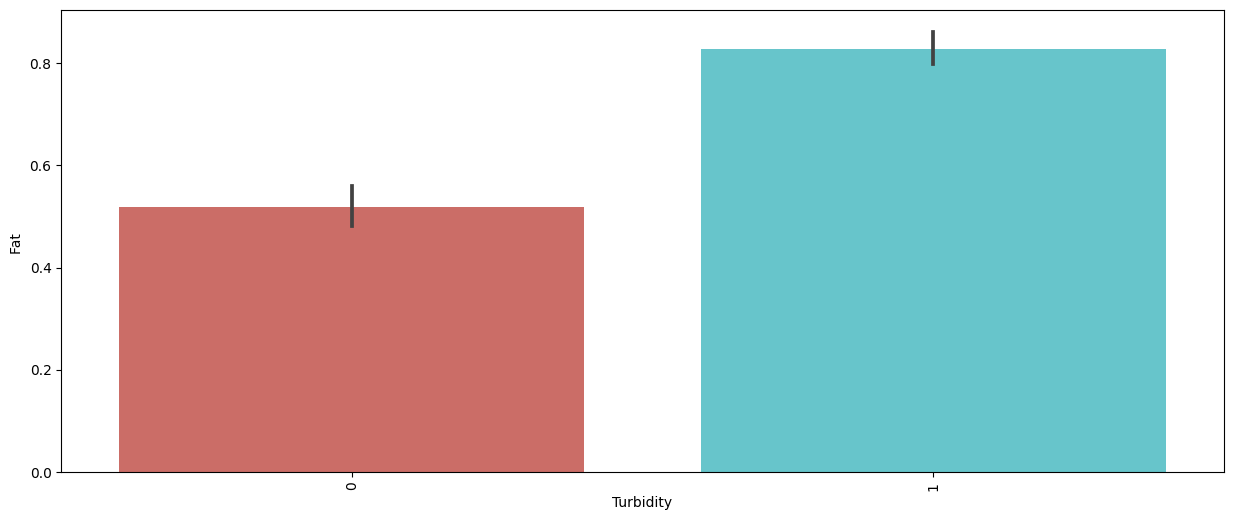

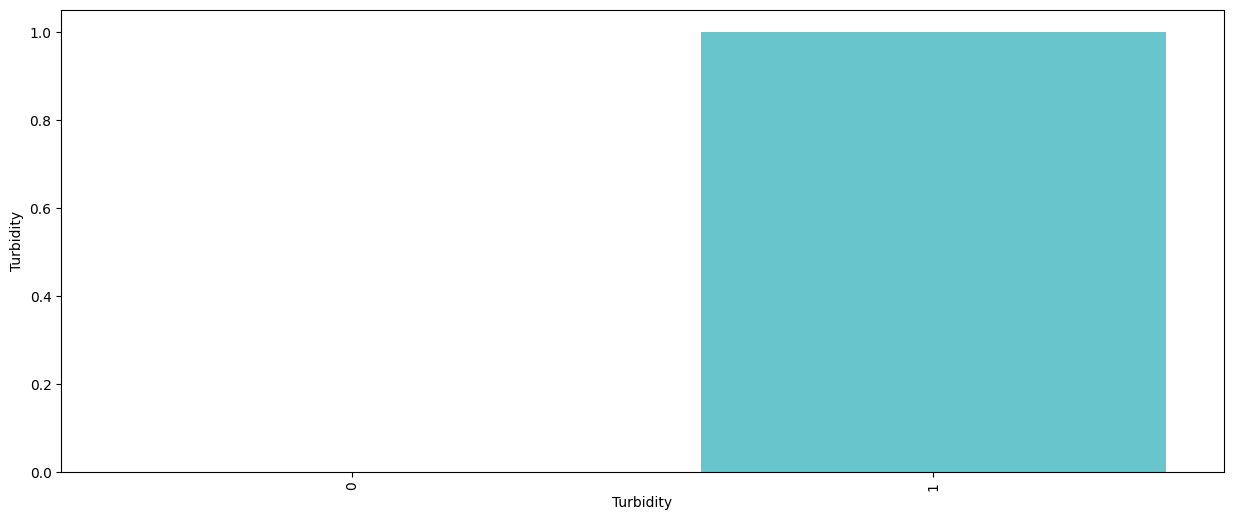

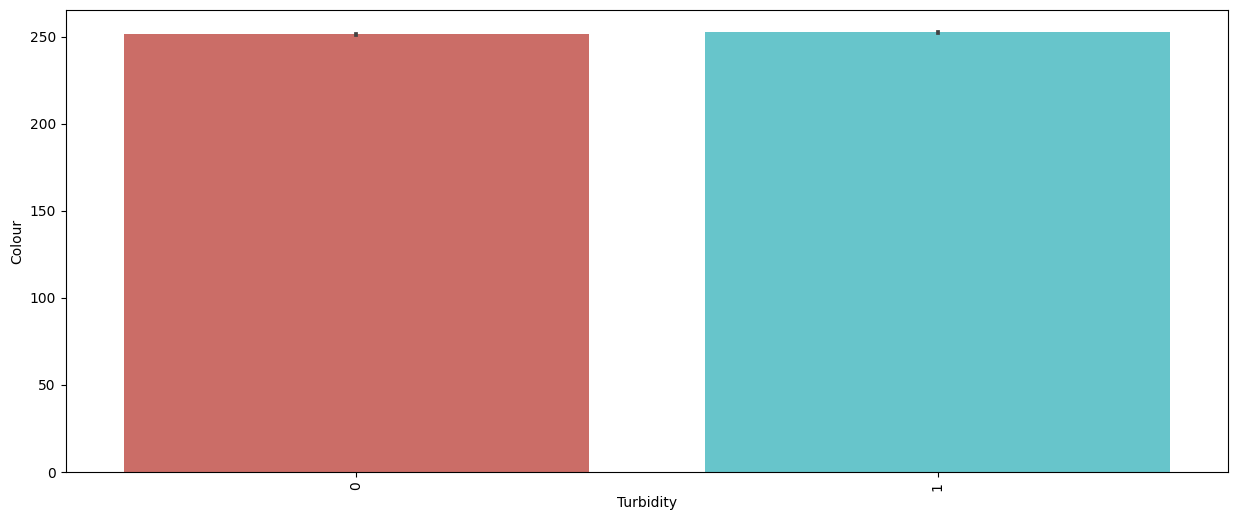

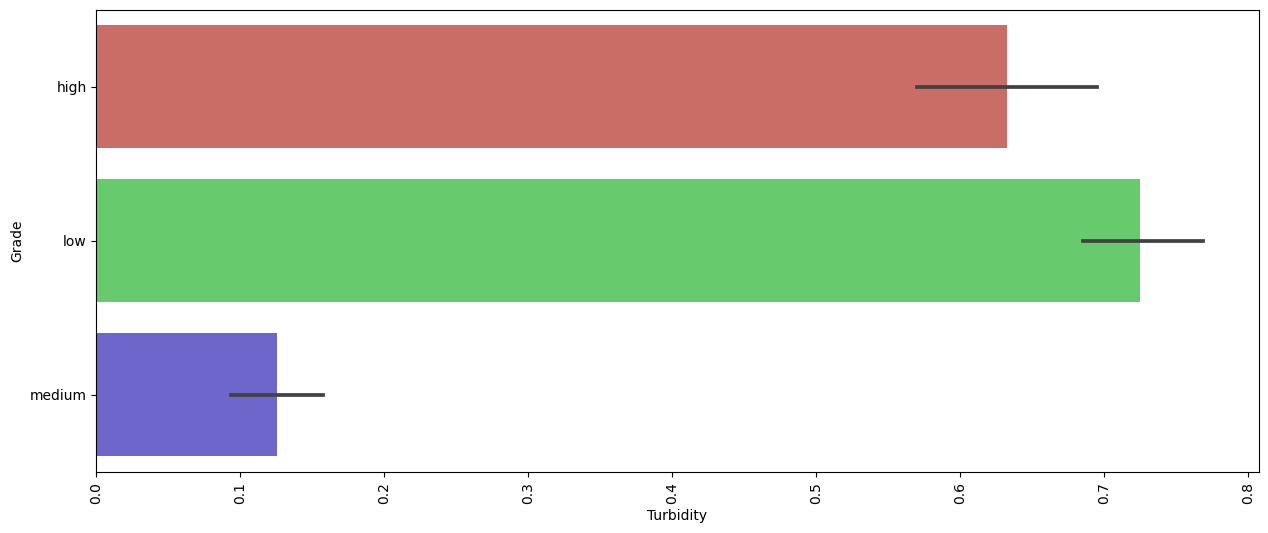

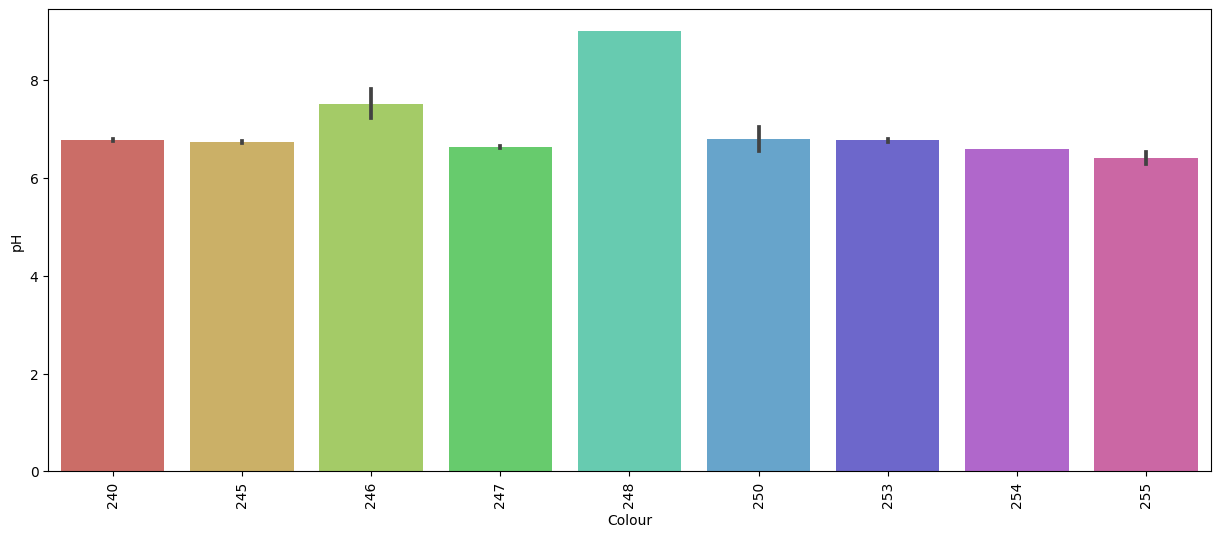

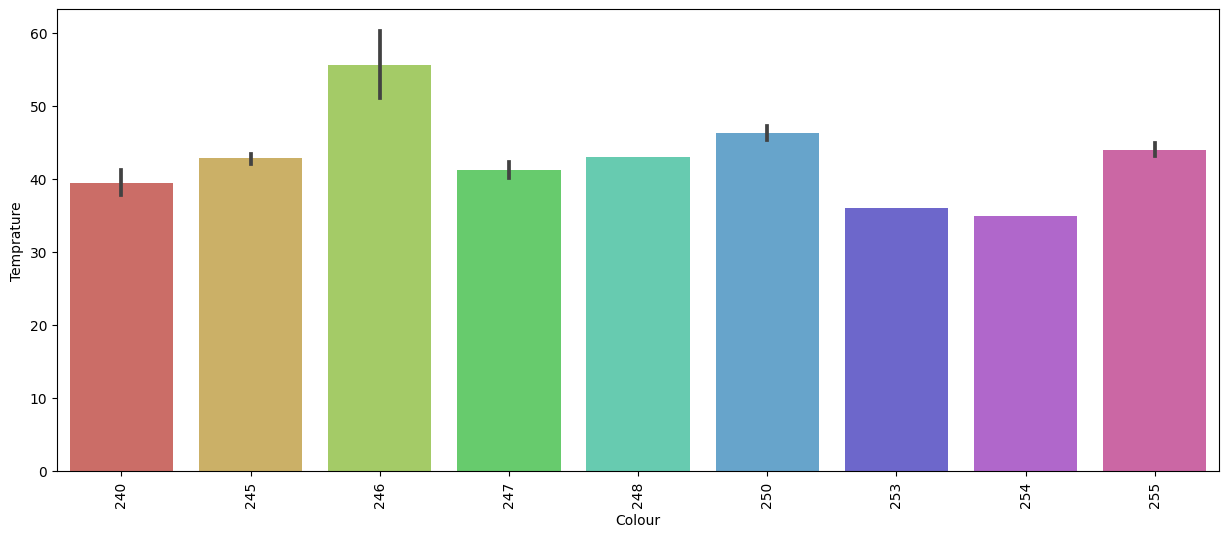

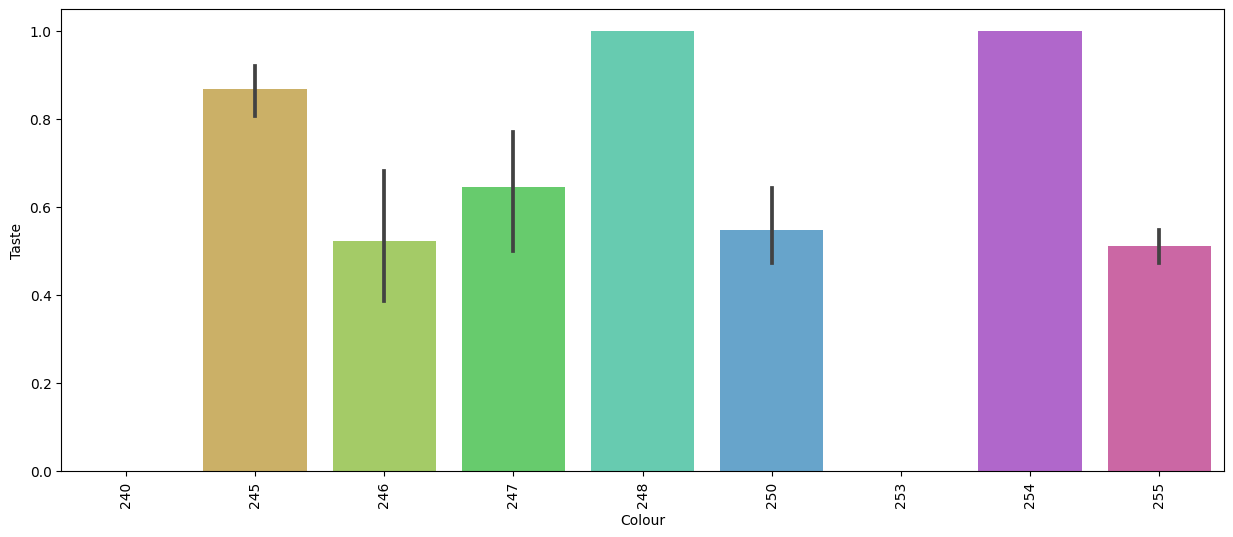

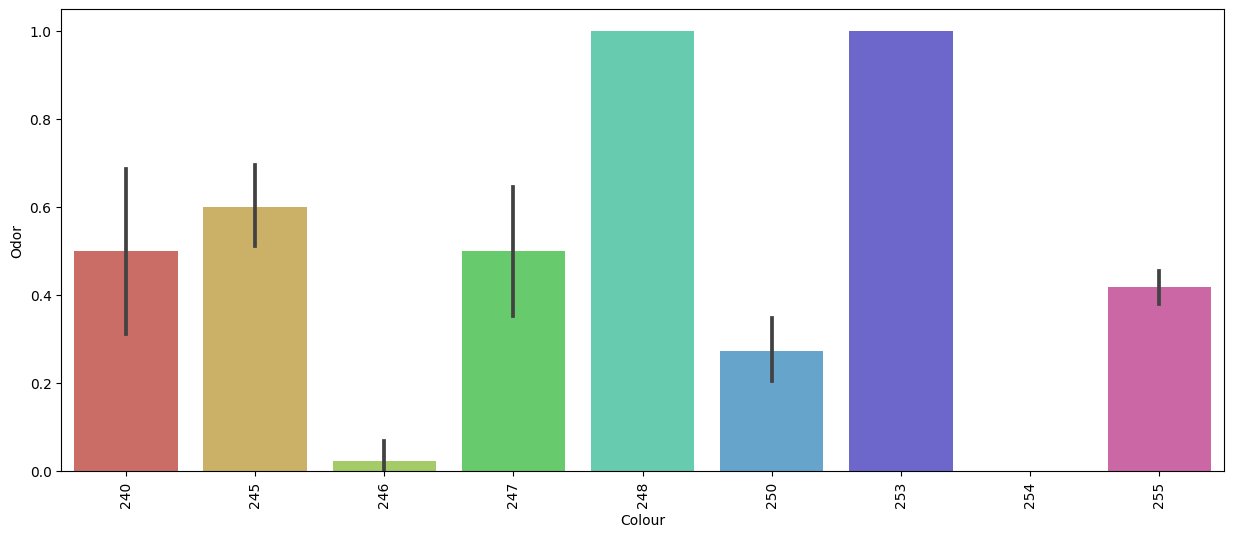

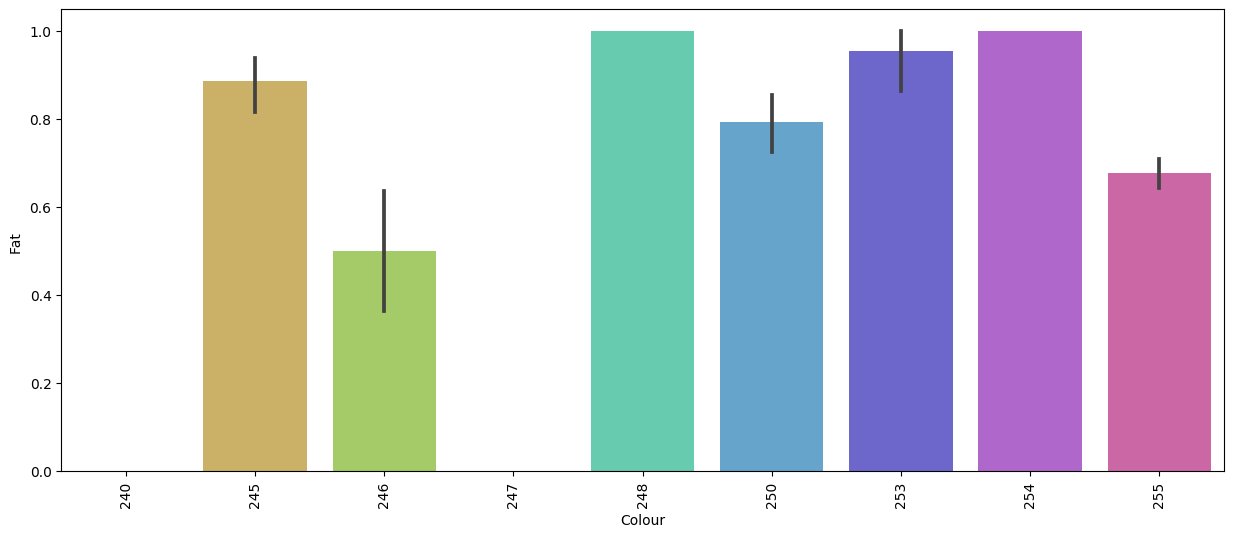

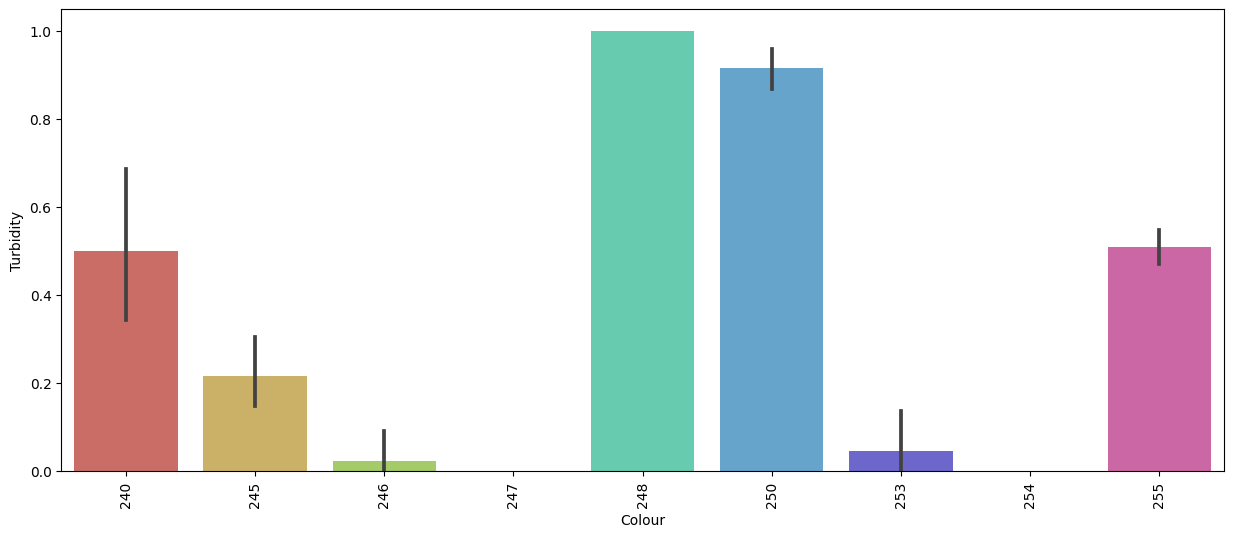

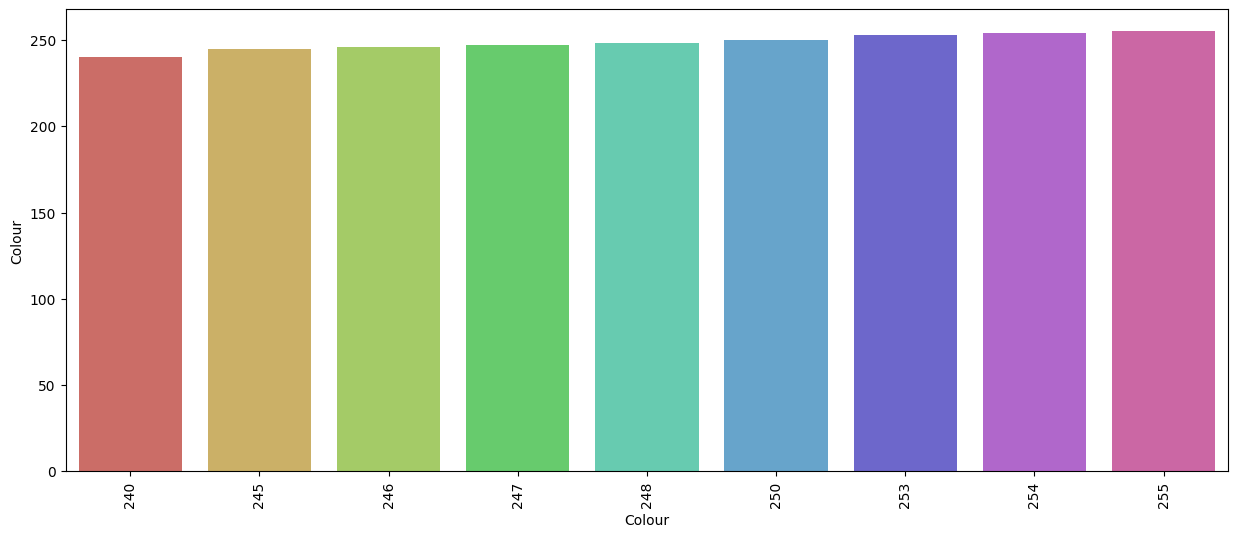

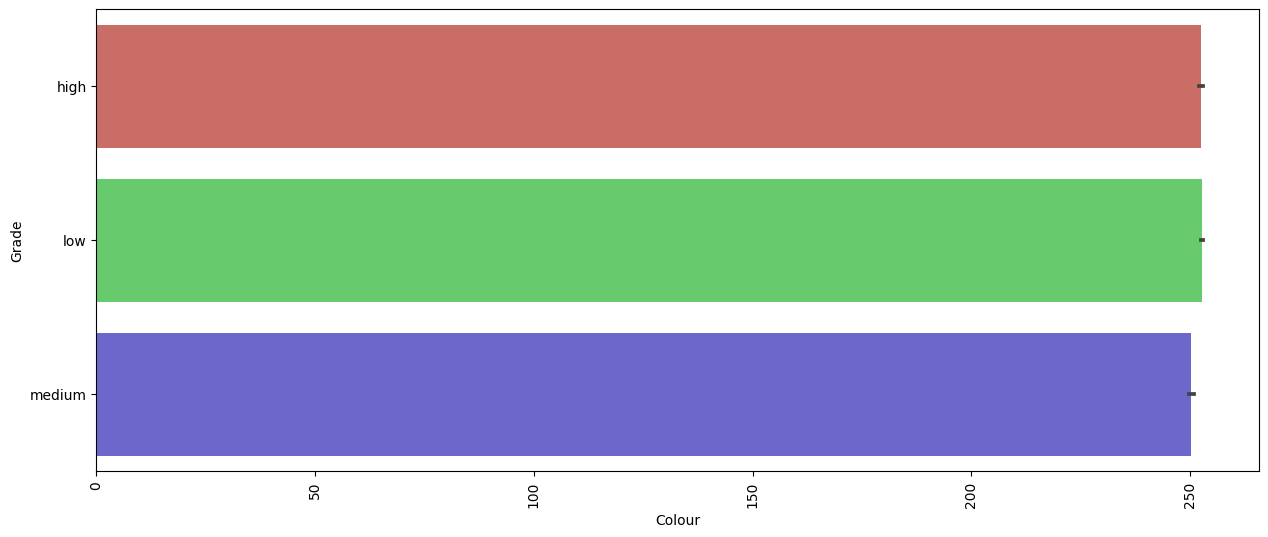

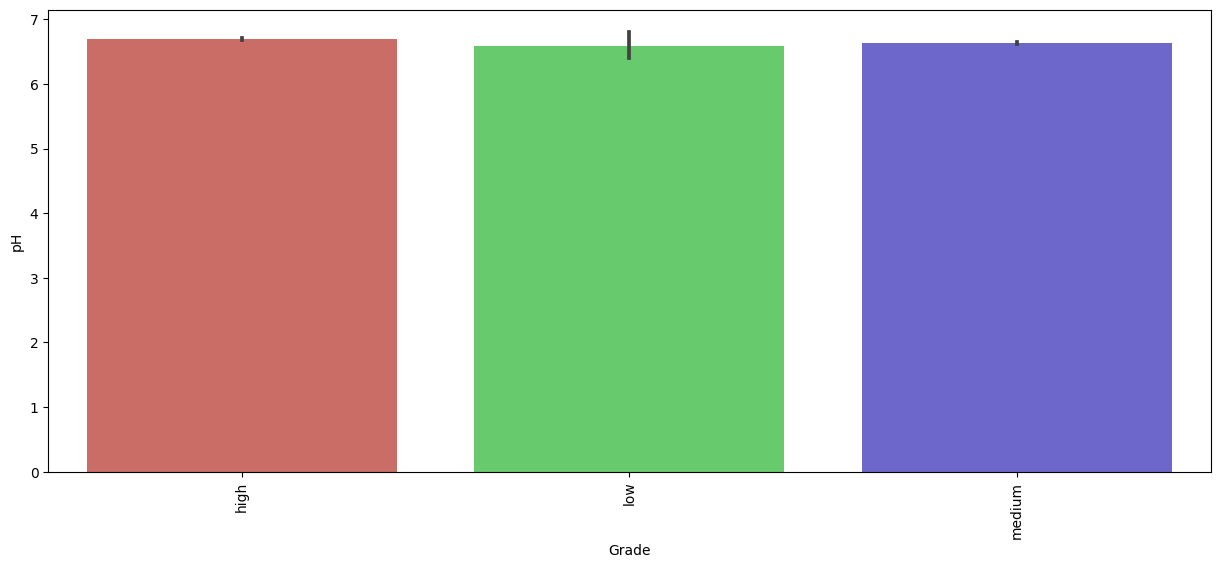

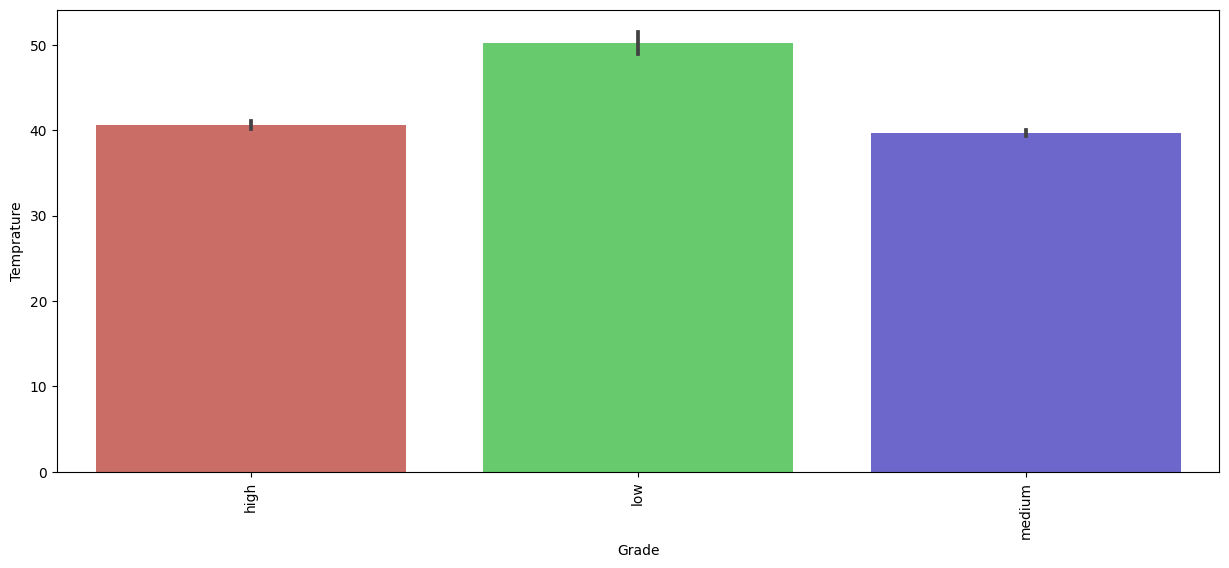

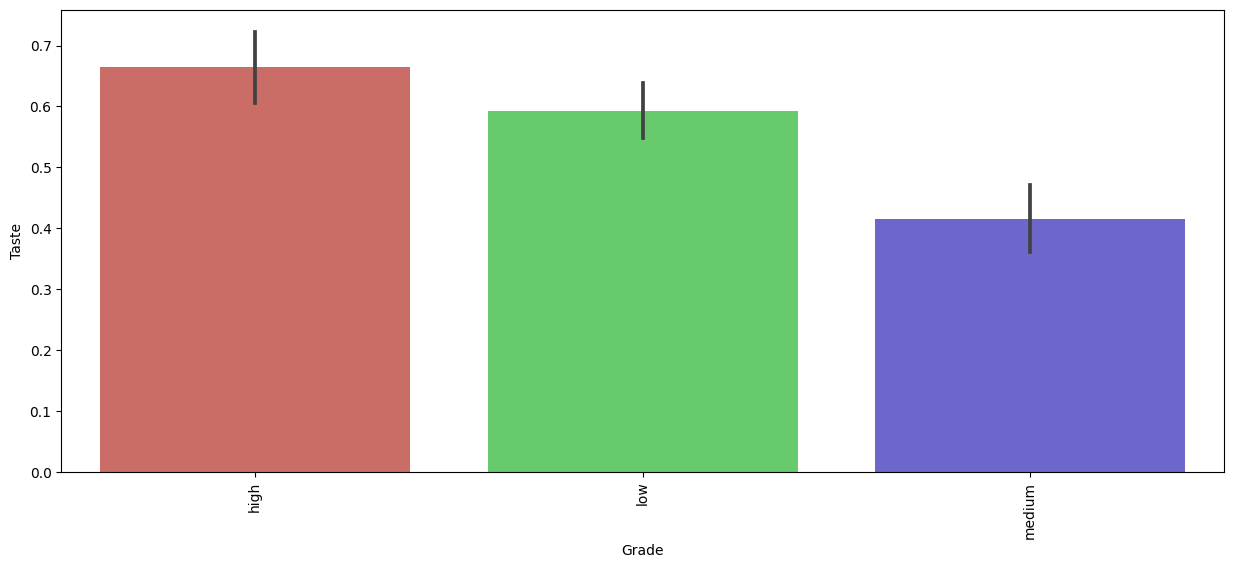

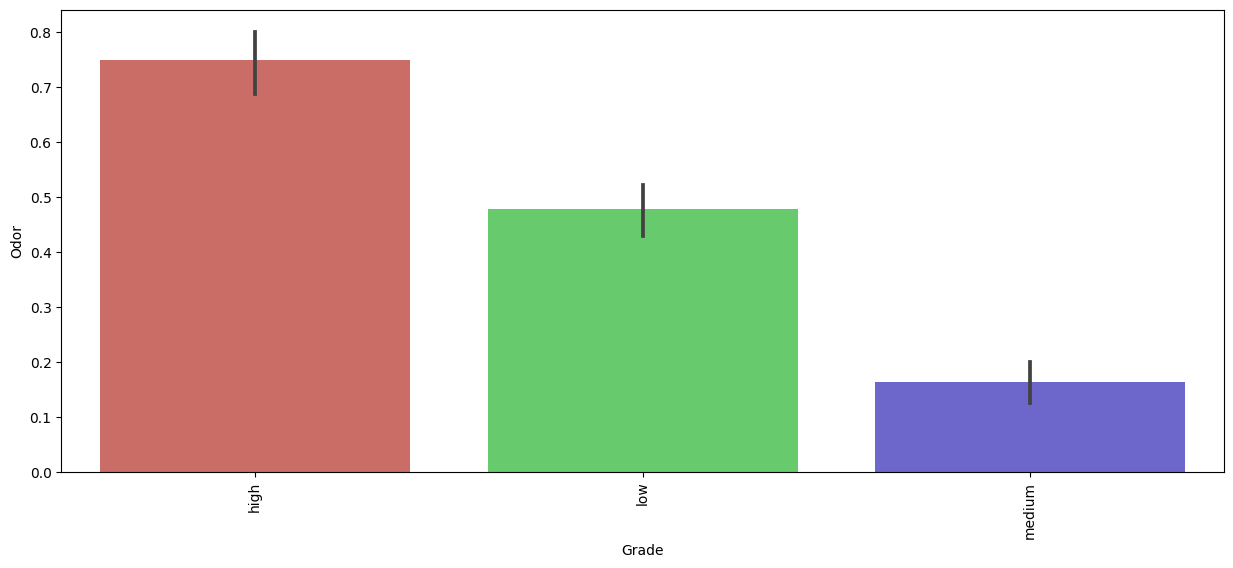

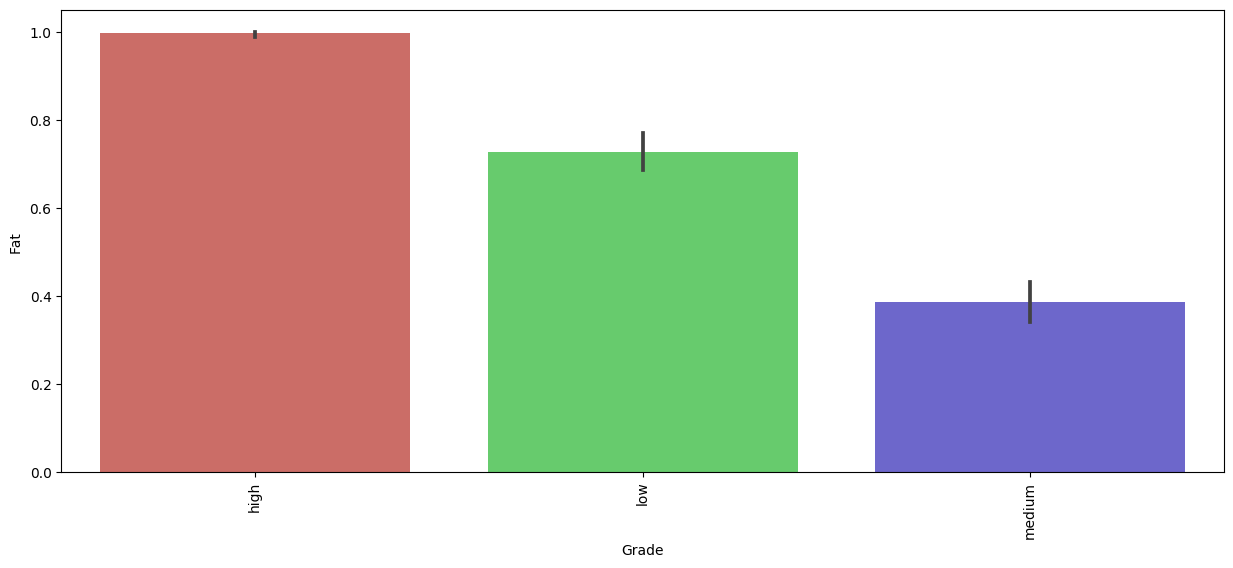

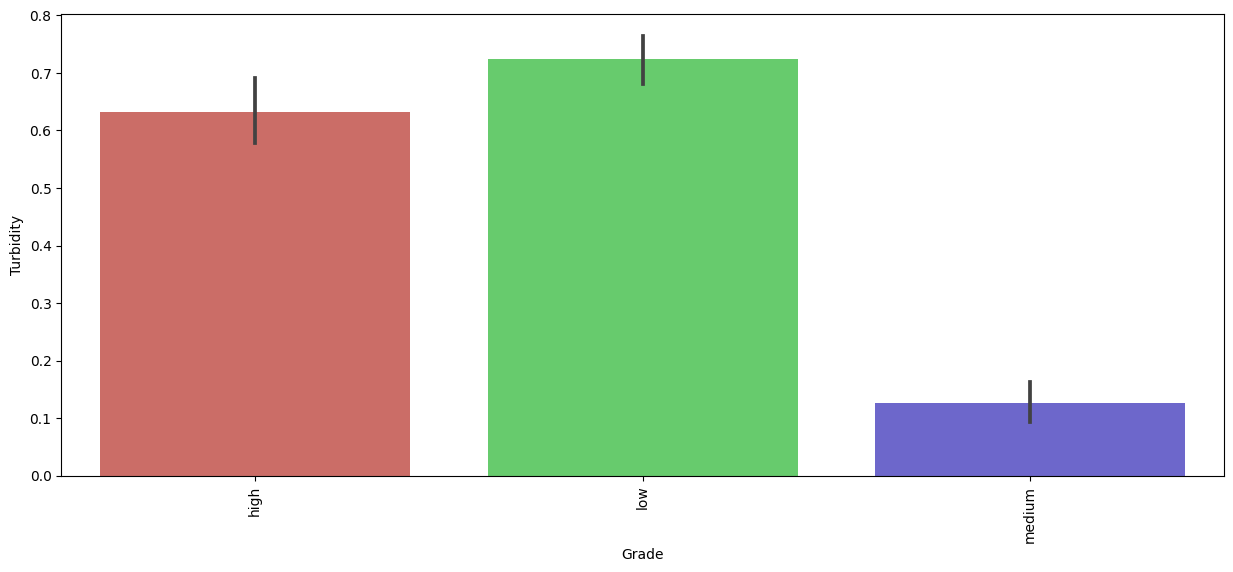

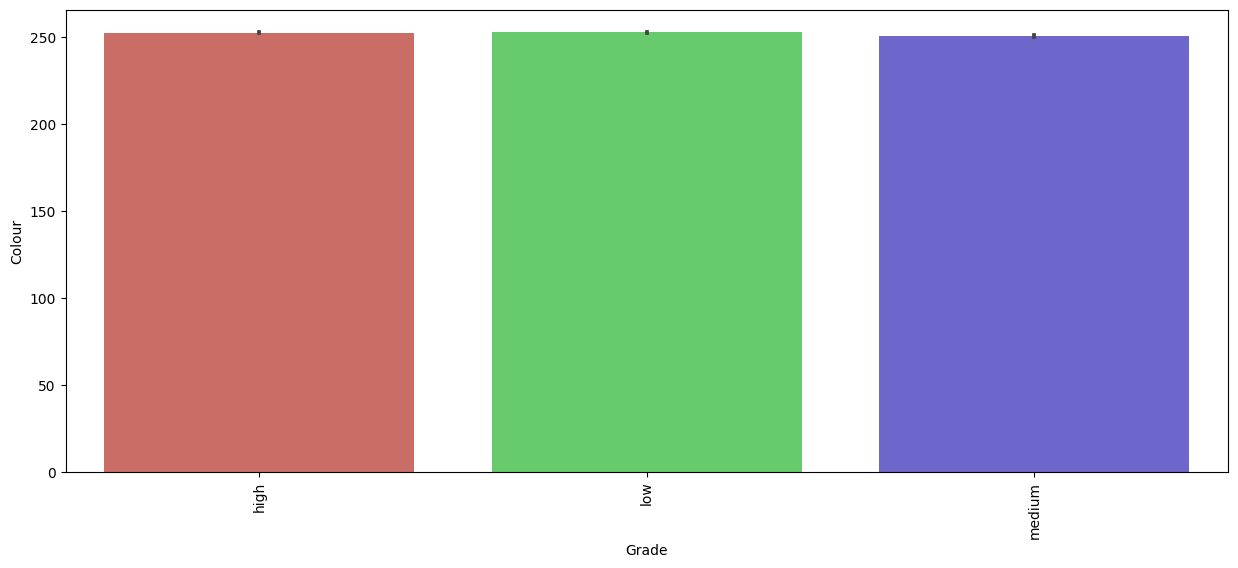

TypeError: ignored

<Figure size 1500x600 with 0 Axes>

In [27]:
for i in df.columns:
 for j in df.columns:
  plt.figure(figsize=(15,6))
  sns.barplot(x = df[i], y = df[j], data = df, palette = 'hls')
  plt.xticks(rotation = 90)
  plt.show()

In [29]:
df_corr = df.corr()
df_corr

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


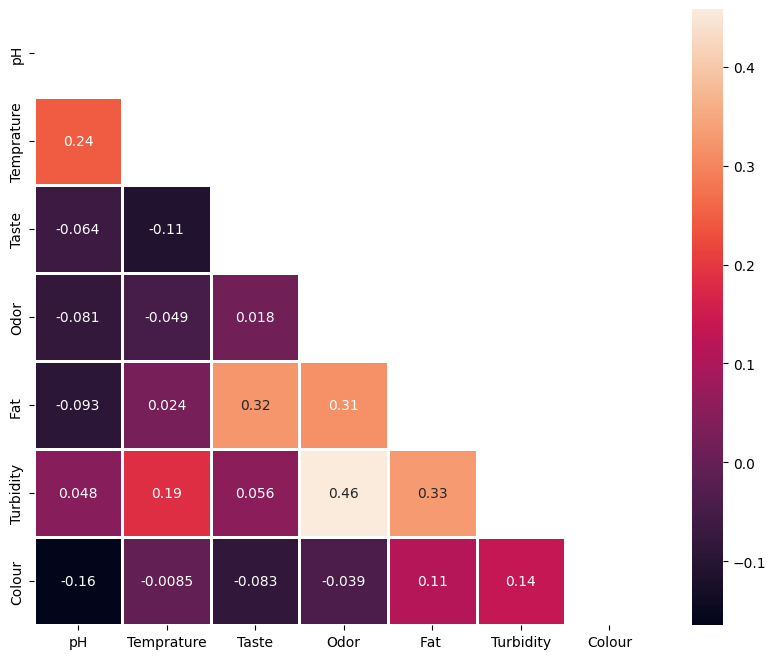

In [30]:
plt.figure(figsize=(10, 8))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

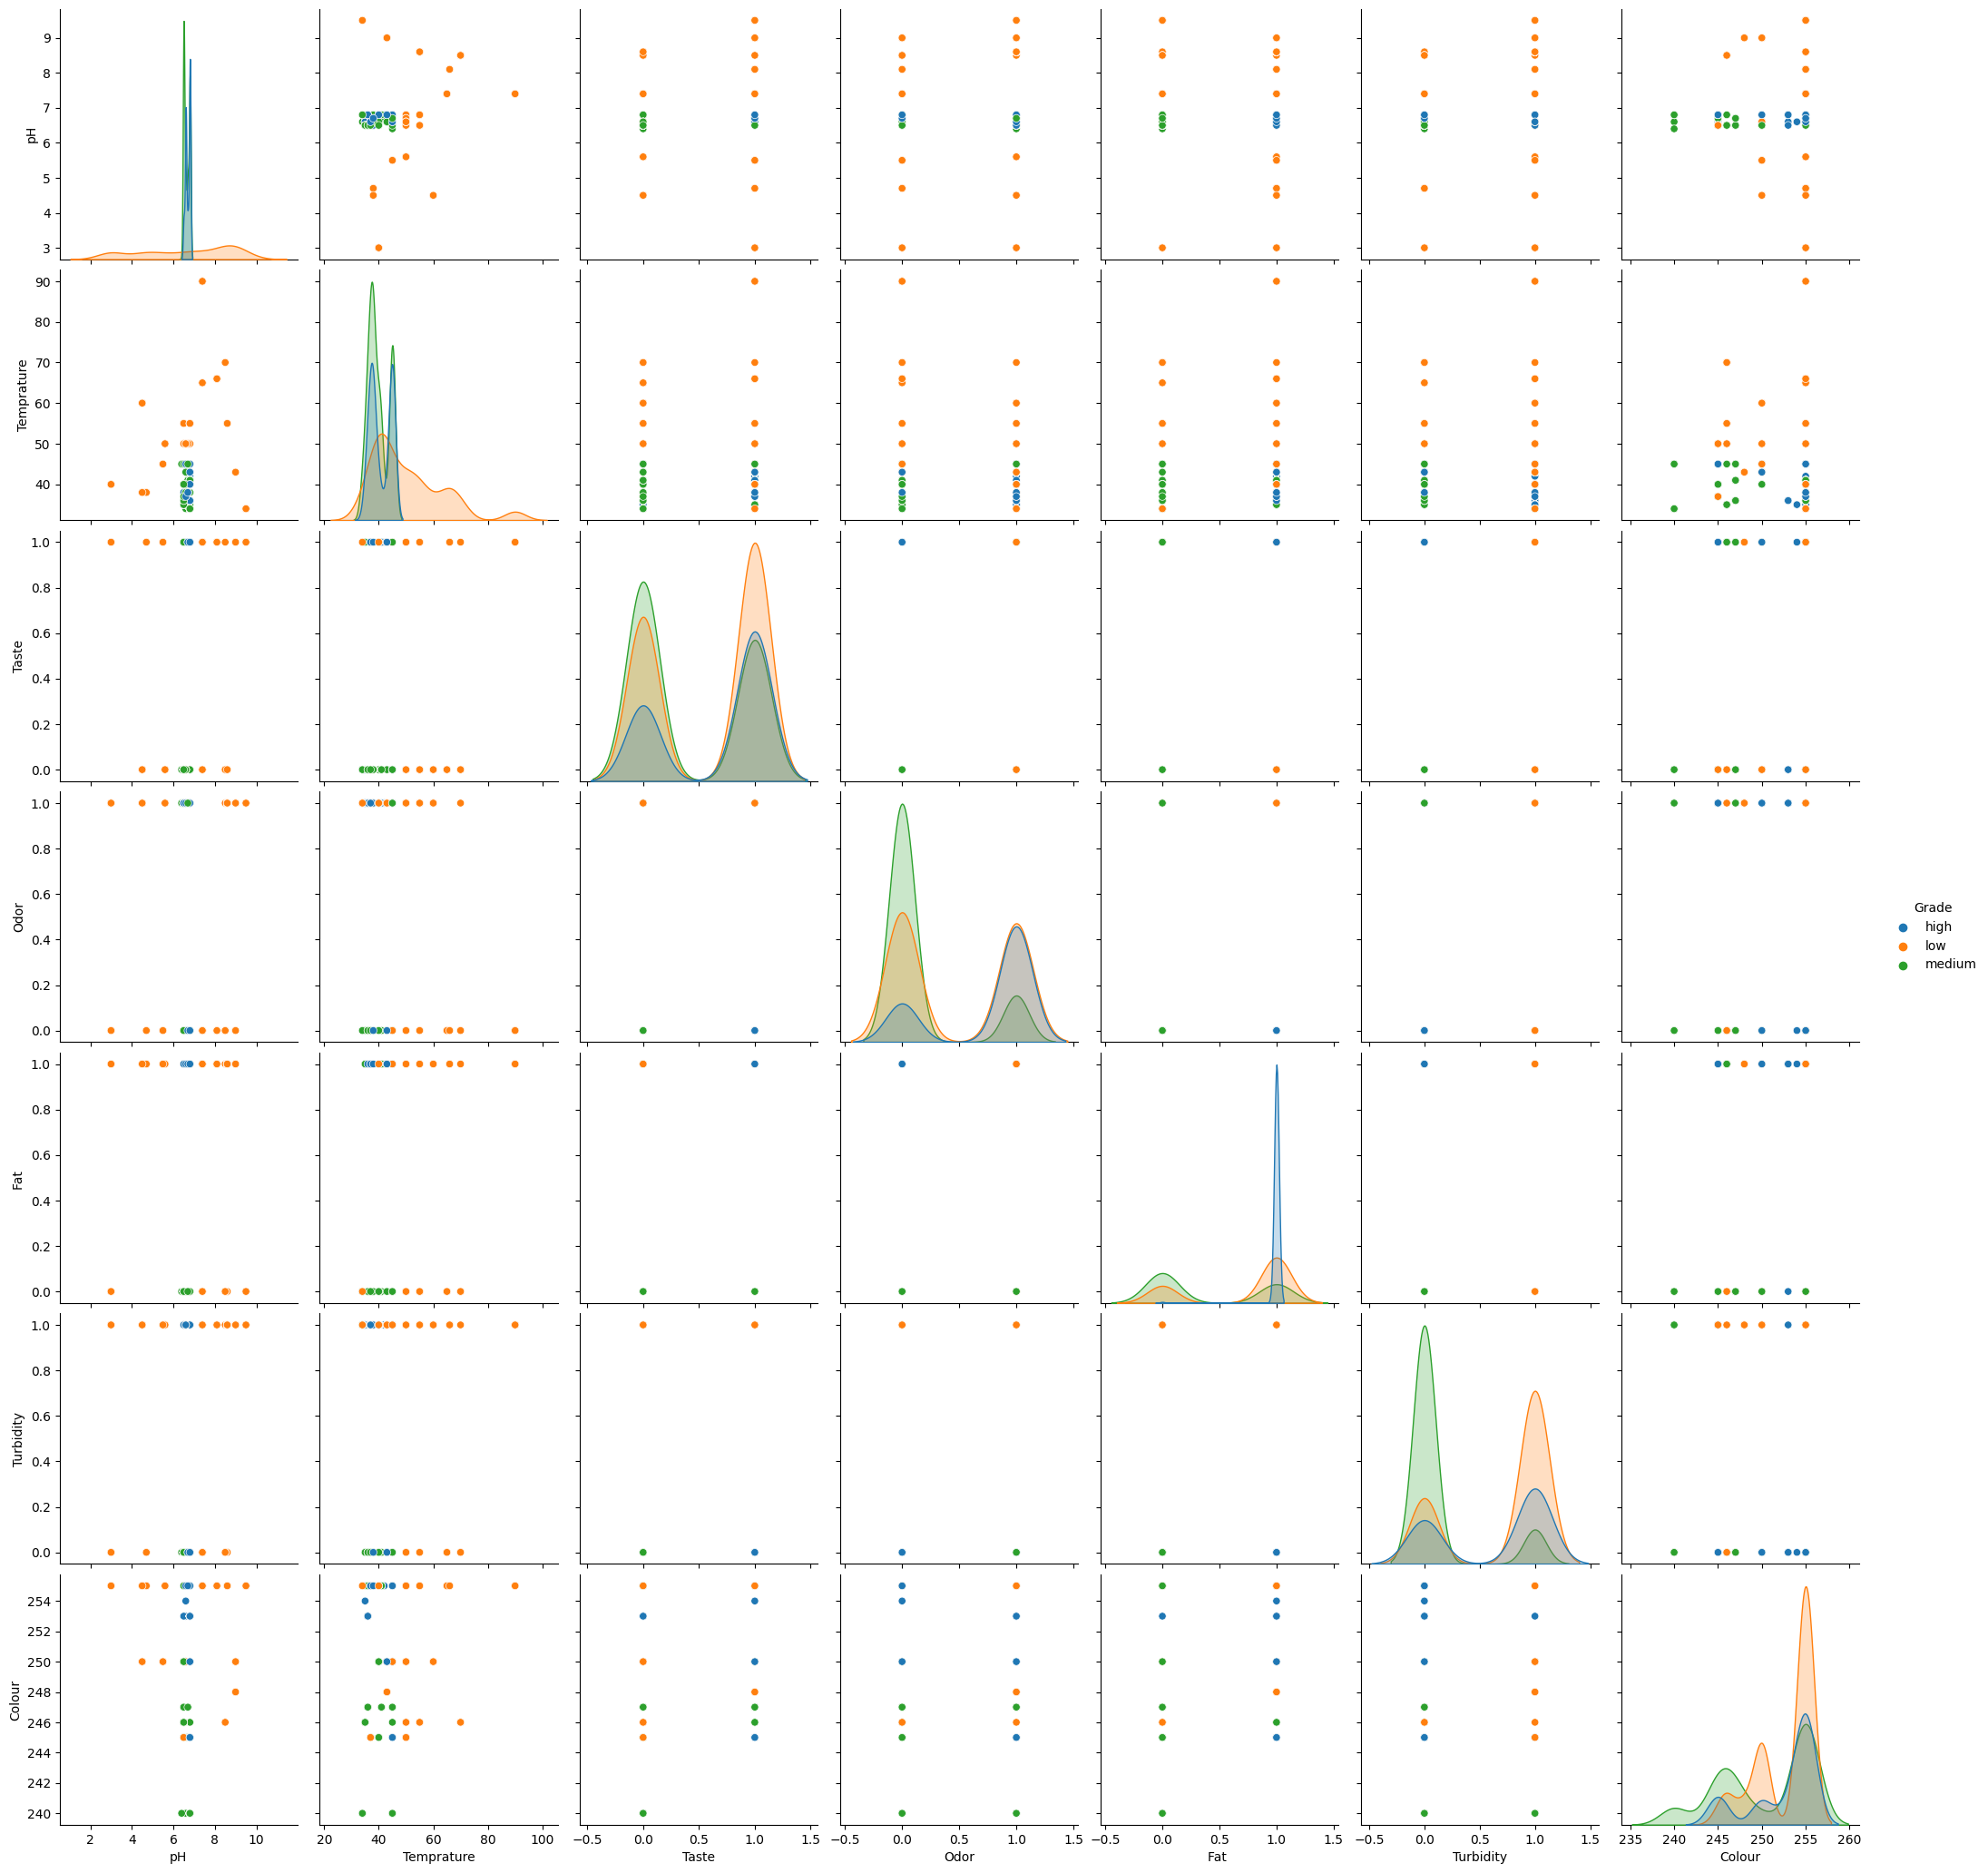

In [31]:
sns.pairplot(df,hue="Grade",height=3)
plt.show()


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Grade'] = le.fit_transform(df['Grade'])

In [33]:
X= df.drop("Temprature", axis = 1)
y= df["Temprature"]

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.80, random_state = 41)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
print(mse)
print(r2)

95.63162429462847
0.14763496777448937


In [40]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print(r2)

Mean Squared Error: 16.55803211456336
0.8524181965848553
